In [1]:
import subprocess
import re
from math import isclose

def is_float(value):
    """주어진 값이 부동소수점 수인지 확인합니다."""
    return bool(re.match(r'^-?\d+(\.\d+)?$', value))

def compare_outputs(actual, expected, partial=False):
    """실제 출력과 예상 출력을 비교합니다. 부분적 일치도 허용될 수 있습니다."""
    if partial:
        expected = expected[:len(actual)]
    if len(actual) > len(expected):
        return False  # 실제 출력이 예상 출력보다 길면, 일치하지 않습니다.
    for output, gold in zip(actual, expected):
        if is_float(output) and is_float(gold):
            if not isclose(float(output), float(gold), rel_tol=1e-9):
                return False
        elif output != gold:
            return False
    return True

def run_test_cases(file, input_data_list, expected_output_list):
    Test_Failure_List = []
    """테스트 케이스를 실행하고, 정확도를 계산합니다."""
    correct_tests = 0

    for index, cpp_input in enumerate(input_data_list):
        partial = False
        try:
            process = subprocess.run([f'./gold_compile_folder/{file[:-4]}'], input=cpp_input, text=True, capture_output=True, timeout=10)
            actual_output = process.stdout.strip().split()
        except subprocess.TimeoutExpired as e:
            actual_output = e.stdout.strip().split() if e.stdout else []
            partial = True
        if compare_outputs(actual_output, expected_output_list[index], partial=partial):
            correct_tests += 1
        else:
            expected_output = ' '.join(expected_output_list[index])
            actual_output_joined = ' '.join(actual_output)
            with open(f'./gold_test_case_error_log/{file[:-4]}.txt', 'a') as err_log_file:
                err_log_file.write(f"Test Case {index + 1} Failed: Expected '{expected_output}', Got '{actual_output_joined}'")
            Test_Failure_List.append(index)

    test_case_length = len(input_data_list)
    logical_error_rate = 1 - correct_tests / test_case_length
    print(f'Logical error rate: {logical_error_rate}')

    return [logical_error_rate] + Test_Failure_List   

In [2]:
import os
import json
import subprocess
from tqdm import tqdm

path = './CodeT5_LineNumber_cpp_gold/'
file_list = os.listdir(path)
compile_error = []
gold_logical_error_rate = {}
test_case_error = []
time_out_error = []
file_list.sort()

for cpp_file in tqdm(file_list):
    filepath = path + '/' + cpp_file
    test_case_txt_number = cpp_file.split('Problem_')[1].split('_')[0]
    test_cases_file_path = './cpp_test_case/' + test_case_txt_number + '.txt'
    
    compile_error_log_file = "./gold_test_result/compile_error_log.txt"

    compile_result = subprocess.run(['g++', '-o', f'./gold_compile_folder/{cpp_file[:-4]}', filepath], capture_output=True)
    if compile_result.returncode != 0:
        compile_error.append(f'{cpp_file[:-4]}')
        with open(compile_error_log_file, 'a') as compile_error_file:
            compile_error_file.write(f'{cpp_file[:-4]}\n')
            compile_error_file.write(f'{compile_result.stderr}\n\n')
        continue
        
    with open(test_cases_file_path, 'r') as test_file:
        test_cases = test_file.read().split(', ')  # 각 테스트 케이스 분리
    
    if len(test_cases) < 2:
        print(f'Test Case Error - {test_case_txt_number}.txt')
        test_case_error.append(test_case_txt_number)
        continue
        
    test_data_list = []
    output_list = []

    for index, test_case in enumerate(test_cases):
        if not test_case.strip():
            continue
        input_part, output_part = test_case.split('\noutput: ')
        input_data = input_part.split('input: ')[1]
        expected_output = output_part.strip()
        test_data_list.append(input_data)
        output_list.append(expected_output)

        if index == len(test_cases) - 1:
            output_list[index] = output_list[index].split('\n')[0]

    test_input_list = []
    for in_data in test_data_list:
        in_data = in_data.replace("\\n", "\n")
        test_input_list.append(in_data[1:-1].strip())

    test_output_list = []
    for out_data in output_list:
        out_data = out_data.replace("\\n", '\n')
        out_data = out_data.replace("\"", "")
        out_data = out_data.split()
        test_output_list.append(out_data)

    error_line_number = []
    test_case_length = len(test_output_list)
    correct_test = len(test_output_list)
    test_result = run_test_cases(cpp_file, test_input_list, test_output_list)
    gold_logical_error_rate[cpp_file[:-4]] = test_result
    print(f'{cpp_file[:-4]} Error rate = {test_result[0]}')

pretty_print = json.dumps(gold_logical_error_rate)
print(pretty_print)

print(f'Compile Error {len(compile_error)}')
print(f'Test case error {len(test_case_error)}')

  0%|          | 1/861 [00:01<15:31,  1.08s/it]

Logical error rate: 0.0
Problem_0_CorrectCode_0 Error rate = 0.0


  0%|          | 2/861 [00:04<35:17,  2.47s/it]

Logical error rate: 0.0
Problem_0_CorrectCode_1 Error rate = 0.0


  0%|          | 3/861 [00:08<47:50,  3.35s/it]

Logical error rate: 0.0
Problem_0_CorrectCode_2 Error rate = 0.0


  0%|          | 4/861 [00:13<53:30,  3.75s/it]

Logical error rate: 0.0
Problem_0_CorrectCode_3 Error rate = 0.0


  1%|          | 5/861 [00:14<39:29,  2.77s/it]

Logical error rate: 0.0
Problem_100_CorrectCode_524 Error rate = 0.0


  1%|          | 6/861 [00:15<31:16,  2.20s/it]

Logical error rate: 0.0
Problem_100_CorrectCode_525 Error rate = 0.0


  1%|          | 7/861 [00:16<25:53,  1.82s/it]

Logical error rate: 0.0
Problem_100_CorrectCode_526 Error rate = 0.0


  1%|          | 8/861 [00:17<22:33,  1.59s/it]

Logical error rate: 0.0
Problem_101_CorrectCode_527 Error rate = 0.0


  1%|          | 9/861 [00:18<19:52,  1.40s/it]

Logical error rate: 0.0
Problem_101_CorrectCode_528 Error rate = 0.0


  1%|          | 10/861 [00:19<18:08,  1.28s/it]

Logical error rate: 0.995
Problem_102_CorrectCode_529 Error rate = 0.995


  1%|▏         | 11/861 [00:20<16:59,  1.20s/it]

Logical error rate: 0.0
Problem_102_CorrectCode_530 Error rate = 0.0


  1%|▏         | 12/861 [00:21<16:05,  1.14s/it]

Logical error rate: 0.995
Problem_102_CorrectCode_531 Error rate = 0.995


  2%|▏         | 13/861 [00:22<15:46,  1.12s/it]

Logical error rate: 0.0
Problem_103_CorrectCode_532 Error rate = 0.0


  2%|▏         | 14/861 [00:23<15:21,  1.09s/it]

Logical error rate: 0.0
Problem_103_CorrectCode_533 Error rate = 0.0


  2%|▏         | 15/861 [00:24<15:11,  1.08s/it]

Logical error rate: 0.0
Problem_104_CorrectCode_534 Error rate = 0.0


  2%|▏         | 16/861 [00:25<15:12,  1.08s/it]

Logical error rate: 1.0
Problem_104_CorrectCode_535 Error rate = 1.0


  2%|▏         | 17/861 [00:26<15:29,  1.10s/it]

Logical error rate: 1.0
Problem_104_CorrectCode_536 Error rate = 1.0


  2%|▏         | 18/861 [00:28<17:11,  1.22s/it]

Logical error rate: 0.995
Problem_105_CorrectCode_537 Error rate = 0.995


  2%|▏         | 19/861 [00:29<17:05,  1.22s/it]

Logical error rate: 0.0
Problem_105_CorrectCode_538 Error rate = 0.0


  2%|▏         | 20/861 [00:41<1:01:33,  4.39s/it]

Logical error rate: 0.0
Problem_105_CorrectCode_539 Error rate = 0.0


  2%|▏         | 21/861 [00:42<47:32,  3.40s/it]  

Logical error rate: 0.0
Problem_105_CorrectCode_540 Error rate = 0.0


  3%|▎         | 22/861 [00:43<37:44,  2.70s/it]

Logical error rate: 0.995
Problem_105_CorrectCode_541 Error rate = 0.995


  3%|▎         | 23/861 [00:44<31:22,  2.25s/it]

Logical error rate: 0.0
Problem_105_CorrectCode_542 Error rate = 0.0


  3%|▎         | 24/861 [00:47<31:55,  2.29s/it]

Logical error rate: 0.0
Problem_106_CorrectCode_543 Error rate = 0.0


  3%|▎         | 25/861 [00:49<32:34,  2.34s/it]

Logical error rate: 0.0
Problem_106_CorrectCode_544 Error rate = 0.0


  3%|▎         | 26/861 [00:52<33:02,  2.37s/it]

Logical error rate: 0.0
Problem_106_CorrectCode_545 Error rate = 0.0


  3%|▎         | 27/861 [00:55<37:40,  2.71s/it]

Logical error rate: 0.0
Problem_106_CorrectCode_546 Error rate = 0.0


  3%|▎         | 28/861 [00:57<36:17,  2.61s/it]

Logical error rate: 0.0
Problem_106_CorrectCode_547 Error rate = 0.0


  3%|▎         | 29/861 [01:00<35:32,  2.56s/it]

Logical error rate: 0.0
Problem_106_CorrectCode_548 Error rate = 0.0


  3%|▎         | 30/861 [01:02<34:48,  2.51s/it]

Logical error rate: 0.0
Problem_106_CorrectCode_549 Error rate = 0.0


  4%|▎         | 31/861 [01:05<33:34,  2.43s/it]

Logical error rate: 1.0
Problem_106_CorrectCode_550 Error rate = 1.0


  4%|▎         | 32/861 [01:07<33:40,  2.44s/it]

Logical error rate: 0.0
Problem_106_CorrectCode_551 Error rate = 0.0


  4%|▍         | 33/861 [01:10<34:05,  2.47s/it]

Logical error rate: 0.0
Problem_106_CorrectCode_552 Error rate = 0.0


  4%|▍         | 34/861 [01:11<28:18,  2.05s/it]

Logical error rate: 0.16500000000000004
Problem_107_CorrectCode_553 Error rate = 0.16500000000000004


  4%|▍         | 35/861 [01:12<24:28,  1.78s/it]

Logical error rate: 0.20999999999999996
Problem_107_CorrectCode_554 Error rate = 0.20999999999999996


  4%|▍         | 36/861 [01:13<21:46,  1.58s/it]

Logical error rate: 0.20999999999999996
Problem_107_CorrectCode_555 Error rate = 0.20999999999999996


  4%|▍         | 37/861 [01:14<20:28,  1.49s/it]

Logical error rate: 0.0
Problem_107_CorrectCode_556 Error rate = 0.0


  4%|▍         | 38/861 [01:16<19:58,  1.46s/it]

Logical error rate: 0.09999999999999998
Problem_107_CorrectCode_557 Error rate = 0.09999999999999998


  5%|▍         | 39/861 [01:17<18:27,  1.35s/it]

Logical error rate: 0.17500000000000004
Problem_107_CorrectCode_558 Error rate = 0.17500000000000004


  5%|▍         | 40/861 [01:18<17:33,  1.28s/it]

Logical error rate: 0.17500000000000004
Problem_107_CorrectCode_559 Error rate = 0.17500000000000004


  5%|▍         | 41/861 [01:19<17:15,  1.26s/it]

Logical error rate: 0.0
Problem_108_CorrectCode_560 Error rate = 0.0


  5%|▍         | 42/861 [01:20<16:56,  1.24s/it]

Logical error rate: 0.0
Problem_108_CorrectCode_561 Error rate = 0.0


  5%|▍         | 43/861 [01:21<16:49,  1.23s/it]

Logical error rate: 0.0
Problem_108_CorrectCode_562 Error rate = 0.0


  5%|▌         | 44/861 [01:23<19:20,  1.42s/it]

Logical error rate: 0.0
Problem_109_CorrectCode_563 Error rate = 0.0


  5%|▌         | 45/861 [01:24<18:38,  1.37s/it]

Logical error rate: 0.0
Problem_109_CorrectCode_564 Error rate = 0.0


  5%|▌         | 46/861 [01:26<17:25,  1.28s/it]

Logical error rate: 0.0
Problem_109_CorrectCode_565 Error rate = 0.0


  5%|▌         | 47/861 [01:27<16:24,  1.21s/it]

Logical error rate: 0.0
Problem_10_CorrectCode_25 Error rate = 0.0


  6%|▌         | 48/861 [01:28<15:50,  1.17s/it]

Logical error rate: 0.0
Problem_10_CorrectCode_26 Error rate = 0.0


  6%|▌         | 49/861 [01:29<15:41,  1.16s/it]

Logical error rate: 0.0
Problem_10_CorrectCode_27 Error rate = 0.0


  6%|▌         | 50/861 [01:30<15:21,  1.14s/it]

Logical error rate: 0.0
Problem_10_CorrectCode_28 Error rate = 0.0


  6%|▌         | 51/861 [01:31<15:06,  1.12s/it]

Logical error rate: 0.0
Problem_10_CorrectCode_29 Error rate = 0.0


  6%|▌         | 52/861 [01:32<15:01,  1.11s/it]

Logical error rate: 0.0
Problem_10_CorrectCode_30 Error rate = 0.0


  6%|▌         | 53/861 [01:33<14:47,  1.10s/it]

Logical error rate: 0.0
Problem_10_CorrectCode_31 Error rate = 0.0


  6%|▋         | 54/861 [01:34<15:24,  1.15s/it]

Logical error rate: 0.0
Problem_110_CorrectCode_566 Error rate = 0.0


  6%|▋         | 55/861 [01:36<15:32,  1.16s/it]

Logical error rate: 0.0
Problem_110_CorrectCode_567 Error rate = 0.0


  7%|▋         | 56/861 [01:37<15:55,  1.19s/it]

Logical error rate: 0.0
Problem_110_CorrectCode_568 Error rate = 0.0


  7%|▋         | 57/861 [01:38<15:44,  1.17s/it]

Logical error rate: 0.0
Problem_110_CorrectCode_569 Error rate = 0.0


  7%|▋         | 58/861 [01:39<15:26,  1.15s/it]

Logical error rate: 0.0
Problem_113_CorrectCode_570 Error rate = 0.0


  7%|▋         | 59/861 [01:40<15:11,  1.14s/it]

Logical error rate: 0.0
Problem_113_CorrectCode_571 Error rate = 0.0


  7%|▋         | 60/861 [01:41<14:56,  1.12s/it]

Logical error rate: 0.0
Problem_113_CorrectCode_572 Error rate = 0.0


  7%|▋         | 61/861 [01:42<14:43,  1.10s/it]

Logical error rate: 0.0
Problem_113_CorrectCode_573 Error rate = 0.0


  7%|▋         | 62/861 [01:43<14:32,  1.09s/it]

Logical error rate: 0.0
Problem_113_CorrectCode_574 Error rate = 0.0


  7%|▋         | 63/861 [01:44<14:22,  1.08s/it]

Logical error rate: 0.0
Problem_113_CorrectCode_575 Error rate = 0.0


  7%|▋         | 64/861 [01:45<14:11,  1.07s/it]

Logical error rate: 0.78
Problem_114_CorrectCode_576 Error rate = 0.78


  8%|▊         | 65/861 [01:47<14:14,  1.07s/it]

Logical error rate: 0.78
Problem_114_CorrectCode_577 Error rate = 0.78


  8%|▊         | 66/861 [01:48<14:26,  1.09s/it]

Logical error rate: 0.0
Problem_114_CorrectCode_578 Error rate = 0.0


  8%|▊         | 67/861 [01:49<14:26,  1.09s/it]

Logical error rate: 0.0
Problem_114_CorrectCode_579 Error rate = 0.0


  8%|▊         | 68/861 [01:50<14:31,  1.10s/it]

Logical error rate: 0.0
Problem_114_CorrectCode_580 Error rate = 0.0


  8%|▊         | 69/861 [01:51<14:36,  1.11s/it]

Logical error rate: 0.0
Problem_114_CorrectCode_581 Error rate = 0.0


  8%|▊         | 70/861 [01:52<14:36,  1.11s/it]

Logical error rate: 0.78
Problem_114_CorrectCode_582 Error rate = 0.78


  8%|▊         | 71/861 [01:58<34:47,  2.64s/it]

Logical error rate: 0.0
Problem_114_CorrectCode_583 Error rate = 0.0


  8%|▊         | 72/861 [01:59<28:40,  2.18s/it]

Logical error rate: 0.0
Problem_114_CorrectCode_584 Error rate = 0.0


  8%|▊         | 73/861 [02:01<24:31,  1.87s/it]

Logical error rate: 0.98
Problem_114_CorrectCode_585 Error rate = 0.98


  9%|▊         | 74/861 [02:02<21:25,  1.63s/it]

Logical error rate: 0.0
Problem_114_CorrectCode_586 Error rate = 0.0


  9%|▊         | 75/861 [02:03<19:21,  1.48s/it]

Logical error rate: 0.0
Problem_114_CorrectCode_587 Error rate = 0.0


  9%|▉         | 76/861 [02:04<17:49,  1.36s/it]

Logical error rate: 0.0
Problem_114_CorrectCode_588 Error rate = 0.0


  9%|▉         | 77/861 [02:05<17:00,  1.30s/it]

Logical error rate: 0.0
Problem_114_CorrectCode_589 Error rate = 0.0


  9%|▉         | 78/861 [02:06<16:02,  1.23s/it]

Logical error rate: 0.0
Problem_115_CorrectCode_590 Error rate = 0.0


  9%|▉         | 79/861 [02:07<15:24,  1.18s/it]

Logical error rate: 0.0
Problem_115_CorrectCode_591 Error rate = 0.0


  9%|▉         | 80/861 [02:08<14:53,  1.14s/it]

Logical error rate: 0.0
Problem_115_CorrectCode_592 Error rate = 0.0


  9%|▉         | 81/861 [02:09<14:42,  1.13s/it]

Logical error rate: 0.0
Problem_116_CorrectCode_593 Error rate = 0.0


 10%|▉         | 82/861 [02:10<14:21,  1.11s/it]

Logical error rate: 0.0
Problem_116_CorrectCode_594 Error rate = 0.0


 10%|▉         | 83/861 [02:16<32:21,  2.50s/it]

Logical error rate: 0.0
Problem_117_CorrectCode_595 Error rate = 0.0


 10%|▉         | 84/861 [02:17<27:26,  2.12s/it]

Logical error rate: 0.0
Problem_117_CorrectCode_596 Error rate = 0.0


 10%|▉         | 85/861 [02:18<23:25,  1.81s/it]

Logical error rate: 0.0
Problem_117_CorrectCode_597 Error rate = 0.0


 10%|▉         | 86/861 [02:22<30:05,  2.33s/it]

Logical error rate: 0.0
Problem_117_CorrectCode_598 Error rate = 0.0


 10%|█         | 87/861 [02:23<25:05,  1.94s/it]

Logical error rate: 0.0
Problem_118_CorrectCode_599 Error rate = 0.0


 10%|█         | 88/861 [02:24<21:32,  1.67s/it]

Logical error rate: 0.0
Problem_119_CorrectCode_600 Error rate = 0.0


 10%|█         | 89/861 [02:25<18:49,  1.46s/it]

Logical error rate: 0.0
Problem_119_CorrectCode_601 Error rate = 0.0


 10%|█         | 90/861 [02:26<17:19,  1.35s/it]

Logical error rate: 0.0
Problem_119_CorrectCode_602 Error rate = 0.0


 11%|█         | 91/861 [02:27<16:17,  1.27s/it]

Logical error rate: 0.0
Problem_119_CorrectCode_603 Error rate = 0.0


 11%|█         | 92/861 [02:28<15:37,  1.22s/it]

Logical error rate: 0.0
Problem_11_CorrectCode_32 Error rate = 0.0


 11%|█         | 93/861 [02:29<15:03,  1.18s/it]

Logical error rate: 0.0
Problem_11_CorrectCode_33 Error rate = 0.0


 11%|█         | 94/861 [02:45<1:09:42,  5.45s/it]

Logical error rate: 0.0
Problem_11_CorrectCode_34 Error rate = 0.0


 11%|█         | 95/861 [02:46<52:53,  4.14s/it]  

Logical error rate: 0.0
Problem_11_CorrectCode_35 Error rate = 0.0


 11%|█         | 96/861 [02:48<44:38,  3.50s/it]

Logical error rate: 0.0
Problem_11_CorrectCode_36 Error rate = 0.0


 11%|█▏        | 97/861 [02:49<35:33,  2.79s/it]

Logical error rate: 0.0
Problem_120_CorrectCode_604 Error rate = 0.0


 11%|█▏        | 98/861 [02:50<28:52,  2.27s/it]

Logical error rate: 0.0
Problem_121_CorrectCode_605 Error rate = 0.0


 11%|█▏        | 99/861 [02:51<24:09,  1.90s/it]

Logical error rate: 0.0
Problem_121_CorrectCode_606 Error rate = 0.0


 12%|█▏        | 100/861 [02:53<24:49,  1.96s/it]

Logical error rate: 0.0
Problem_123_CorrectCode_607 Error rate = 0.0


 12%|█▏        | 101/861 [02:55<25:22,  2.00s/it]

Logical error rate: 0.0
Problem_123_CorrectCode_608 Error rate = 0.0


 12%|█▏        | 102/861 [02:57<25:42,  2.03s/it]

Logical error rate: 0.0
Problem_123_CorrectCode_609 Error rate = 0.0


 12%|█▏        | 103/861 [02:58<21:49,  1.73s/it]

Logical error rate: 0.0
Problem_124_CorrectCode_610 Error rate = 0.0


 12%|█▏        | 104/861 [02:59<19:08,  1.52s/it]

Logical error rate: 0.0
Problem_124_CorrectCode_611 Error rate = 0.0


 12%|█▏        | 105/861 [03:01<17:30,  1.39s/it]

Logical error rate: 0.0
Problem_124_CorrectCode_612 Error rate = 0.0


 12%|█▏        | 106/861 [03:02<16:29,  1.31s/it]

Logical error rate: 0.0
Problem_124_CorrectCode_613 Error rate = 0.0


 12%|█▏        | 107/861 [03:03<15:35,  1.24s/it]

Logical error rate: 0.0
Problem_124_CorrectCode_614 Error rate = 0.0


 13%|█▎        | 108/861 [03:04<15:00,  1.20s/it]

Logical error rate: 0.0
Problem_124_CorrectCode_615 Error rate = 0.0


 13%|█▎        | 109/861 [03:05<14:26,  1.15s/it]

Logical error rate: 0.0
Problem_124_CorrectCode_616 Error rate = 0.0


 13%|█▎        | 110/861 [03:06<14:09,  1.13s/it]

Logical error rate: 0.0
Problem_127_CorrectCode_617 Error rate = 0.0


 13%|█▎        | 111/861 [03:07<14:04,  1.13s/it]

Logical error rate: 0.0
Problem_127_CorrectCode_618 Error rate = 0.0


 13%|█▎        | 112/861 [03:08<13:59,  1.12s/it]

Logical error rate: 0.0
Problem_128_CorrectCode_619 Error rate = 0.0


 13%|█▎        | 113/861 [03:09<13:55,  1.12s/it]

Logical error rate: 1.0
Problem_128_CorrectCode_620 Error rate = 1.0


 13%|█▎        | 114/861 [03:10<14:01,  1.13s/it]

Logical error rate: 0.0
Problem_129_CorrectCode_621 Error rate = 0.0


 13%|█▎        | 115/861 [03:12<13:53,  1.12s/it]

Logical error rate: 0.0
Problem_129_CorrectCode_622 Error rate = 0.0


 13%|█▎        | 116/861 [03:13<13:25,  1.08s/it]

Logical error rate: 0.0
Problem_12_CorrectCode_37 Error rate = 0.0


 14%|█▎        | 117/861 [03:14<13:53,  1.12s/it]

Logical error rate: 0.0
Problem_12_CorrectCode_38 Error rate = 0.0


 14%|█▎        | 118/861 [03:24<48:20,  3.90s/it]

Logical error rate: 1.0
Problem_130_CorrectCode_623 Error rate = 1.0


 14%|█▍        | 119/861 [03:34<1:10:29,  5.70s/it]

Logical error rate: 1.0
Problem_130_CorrectCode_624 Error rate = 1.0


 14%|█▍        | 120/861 [03:35<53:43,  4.35s/it]  

Logical error rate: 1.0
Problem_130_CorrectCode_625 Error rate = 1.0


 14%|█▍        | 121/861 [03:37<42:05,  3.41s/it]

Logical error rate: 1.0
Problem_130_CorrectCode_626 Error rate = 1.0


 14%|█▍        | 122/861 [03:38<34:12,  2.78s/it]

Logical error rate: 0.625
Problem_131_CorrectCode_627 Error rate = 0.625


 14%|█▍        | 123/861 [03:38<26:15,  2.14s/it]

Test Case Error - 132.txt


 14%|█▍        | 124/861 [03:39<20:41,  1.68s/it]

Test Case Error - 132.txt


 15%|█▍        | 125/861 [03:40<16:45,  1.37s/it]

Test Case Error - 132.txt


 15%|█▍        | 126/861 [03:40<14:02,  1.15s/it]

Test Case Error - 132.txt


 15%|█▍        | 127/861 [03:41<12:10,  1.00it/s]

Test Case Error - 132.txt


 15%|█▍        | 128/861 [03:42<10:51,  1.13it/s]

Test Case Error - 132.txt


 15%|█▍        | 129/861 [03:42<09:53,  1.23it/s]

Test Case Error - 132.txt


 15%|█▌        | 130/861 [03:43<10:24,  1.17it/s]

Logical error rate: 0.0
Problem_133_CorrectCode_635 Error rate = 0.0


 15%|█▌        | 133/861 [03:45<09:51,  1.23it/s]

Logical error rate: 0.0
Problem_134_CorrectCode_638 Error rate = 0.0


 16%|█▌        | 134/861 [03:46<10:48,  1.12it/s]

Logical error rate: 0.0
Problem_134_CorrectCode_639 Error rate = 0.0


 16%|█▌        | 135/861 [03:48<11:33,  1.05it/s]

Logical error rate: 0.0
Problem_134_CorrectCode_640 Error rate = 0.0


 16%|█▌        | 136/861 [03:49<12:02,  1.00it/s]

Logical error rate: 0.0
Problem_134_CorrectCode_641 Error rate = 0.0


 16%|█▌        | 137/861 [03:50<12:22,  1.02s/it]

Logical error rate: 0.0
Problem_135_CorrectCode_642 Error rate = 0.0


 16%|█▌        | 138/861 [03:51<12:37,  1.05s/it]

Logical error rate: 0.0
Problem_135_CorrectCode_643 Error rate = 0.0


 16%|█▌        | 139/861 [03:52<12:26,  1.03s/it]

Logical error rate: 0.0
Problem_136_CorrectCode_644 Error rate = 0.0


 16%|█▋        | 140/861 [03:53<12:39,  1.05s/it]

Logical error rate: 0.0
Problem_136_CorrectCode_645 Error rate = 0.0


 16%|█▋        | 141/861 [03:54<12:48,  1.07s/it]

Logical error rate: 0.0
Problem_136_CorrectCode_646 Error rate = 0.0


 16%|█▋        | 142/861 [03:55<12:51,  1.07s/it]

Logical error rate: 0.0
Problem_136_CorrectCode_647 Error rate = 0.0


 17%|█▋        | 143/861 [03:56<12:57,  1.08s/it]

Logical error rate: 0.0
Problem_136_CorrectCode_648 Error rate = 0.0


 17%|█▋        | 144/861 [03:57<13:00,  1.09s/it]

Logical error rate: 0.0
Problem_136_CorrectCode_649 Error rate = 0.0


 17%|█▋        | 145/861 [03:58<13:00,  1.09s/it]

Logical error rate: 0.0
Problem_136_CorrectCode_650 Error rate = 0.0


 17%|█▋        | 146/861 [04:00<13:02,  1.09s/it]

Logical error rate: 0.0
Problem_136_CorrectCode_651 Error rate = 0.0


 17%|█▋        | 147/861 [04:01<12:48,  1.08s/it]

Logical error rate: 0.0
Problem_136_CorrectCode_652 Error rate = 0.0


 17%|█▋        | 148/861 [04:02<12:50,  1.08s/it]

Logical error rate: 0.0
Problem_136_CorrectCode_653 Error rate = 0.0


 17%|█▋        | 149/861 [04:03<13:00,  1.10s/it]

Logical error rate: 0.0
Problem_136_CorrectCode_654 Error rate = 0.0


 17%|█▋        | 150/861 [04:04<13:03,  1.10s/it]

Logical error rate: 0.0
Problem_136_CorrectCode_655 Error rate = 0.0


 18%|█▊        | 151/861 [04:05<12:59,  1.10s/it]

Logical error rate: 0.0
Problem_136_CorrectCode_656 Error rate = 0.0


 18%|█▊        | 152/861 [04:06<12:56,  1.09s/it]

Logical error rate: 0.0
Problem_137_CorrectCode_657 Error rate = 0.0


 18%|█▊        | 153/861 [04:07<13:11,  1.12s/it]

Logical error rate: 0.0
Problem_137_CorrectCode_658 Error rate = 0.0


 18%|█▊        | 154/861 [04:11<22:23,  1.90s/it]

Logical error rate: 0.0
Problem_138_CorrectCode_659 Error rate = 0.0


 18%|█▊        | 155/861 [04:12<20:22,  1.73s/it]

Logical error rate: 0.0
Problem_138_CorrectCode_660 Error rate = 0.0


 18%|█▊        | 156/861 [04:13<18:09,  1.55s/it]

Logical error rate: 0.0
Problem_138_CorrectCode_661 Error rate = 0.0


 18%|█▊        | 157/861 [04:15<16:54,  1.44s/it]

Logical error rate: 0.0
Problem_138_CorrectCode_662 Error rate = 0.0


 18%|█▊        | 158/861 [04:16<15:36,  1.33s/it]

Logical error rate: 1.0
Problem_139_CorrectCode_663 Error rate = 1.0


 18%|█▊        | 159/861 [04:17<14:32,  1.24s/it]

Logical error rate: 0.0
Problem_139_CorrectCode_664 Error rate = 0.0


 19%|█▊        | 160/861 [04:18<13:55,  1.19s/it]

Logical error rate: 0.0
Problem_139_CorrectCode_665 Error rate = 0.0


 19%|█▊        | 161/861 [04:19<13:24,  1.15s/it]

Logical error rate: 0.0
Problem_139_CorrectCode_666 Error rate = 0.0


 19%|█▉        | 162/861 [04:20<13:01,  1.12s/it]

Logical error rate: 0.0
Problem_139_CorrectCode_667 Error rate = 0.0


 19%|█▉        | 163/861 [04:21<12:52,  1.11s/it]

Logical error rate: 0.0
Problem_139_CorrectCode_668 Error rate = 0.0


 19%|█▉        | 164/861 [04:22<12:40,  1.09s/it]

Logical error rate: 0.0
Problem_139_CorrectCode_669 Error rate = 0.0


 19%|█▉        | 165/861 [04:23<12:29,  1.08s/it]

Logical error rate: 0.0
Problem_139_CorrectCode_670 Error rate = 0.0


 19%|█▉        | 166/861 [04:24<12:32,  1.08s/it]

Logical error rate: 0.0
Problem_139_CorrectCode_671 Error rate = 0.0


 19%|█▉        | 167/861 [04:25<12:33,  1.09s/it]

Logical error rate: 0.0
Problem_139_CorrectCode_672 Error rate = 0.0


 20%|█▉        | 168/861 [04:26<12:36,  1.09s/it]

Logical error rate: 0.0
Problem_139_CorrectCode_673 Error rate = 0.0


 20%|█▉        | 169/861 [04:27<12:23,  1.07s/it]

Logical error rate: 0.0
Problem_139_CorrectCode_674 Error rate = 0.0


 20%|█▉        | 170/861 [04:29<12:23,  1.08s/it]

Logical error rate: 1.0
Problem_13_CorrectCode_39 Error rate = 1.0


 20%|█▉        | 171/861 [04:30<12:20,  1.07s/it]

Logical error rate: 0.0
Problem_13_CorrectCode_40 Error rate = 0.0


 20%|█▉        | 172/861 [04:31<12:14,  1.07s/it]

Logical error rate: 0.0
Problem_13_CorrectCode_41 Error rate = 0.0


 20%|██        | 173/861 [37:54<114:58:56, 601.65s/it]

Logical error rate: 0.0
Problem_13_CorrectCode_42 Error rate = 0.0


 20%|██        | 174/861 [37:55<80:25:38, 421.45s/it] 

Logical error rate: 0.0
Problem_13_CorrectCode_43 Error rate = 0.0


 20%|██        | 175/861 [37:56<56:16:41, 295.34s/it]

Logical error rate: 0.0
Problem_13_CorrectCode_44 Error rate = 0.0


 20%|██        | 176/861 [37:57<39:23:58, 207.06s/it]

Logical error rate: 0.0
Problem_13_CorrectCode_45 Error rate = 0.0


 21%|██        | 177/861 [37:58<27:35:54, 145.26s/it]

Logical error rate: 0.0
Problem_13_CorrectCode_46 Error rate = 0.0


 21%|██        | 178/861 [37:59<19:21:09, 102.00s/it]

Logical error rate: 0.0
Problem_13_CorrectCode_47 Error rate = 0.0


 21%|██        | 179/861 [38:00<13:35:16, 71.72s/it] 

Logical error rate: 0.0
Problem_13_CorrectCode_48 Error rate = 0.0


 21%|██        | 180/861 [38:01<9:33:34, 50.54s/it] 

Logical error rate: 0.0
Problem_13_CorrectCode_49 Error rate = 0.0


 21%|██        | 181/861 [38:02<6:44:28, 35.69s/it]

Logical error rate: 0.0
Problem_13_CorrectCode_50 Error rate = 0.0


 21%|██        | 182/861 [38:03<4:46:24, 25.31s/it]

Logical error rate: 0.0
Problem_13_CorrectCode_51 Error rate = 0.0


 21%|██▏       | 183/861 [38:04<3:23:49, 18.04s/it]

Logical error rate: 0.0
Problem_13_CorrectCode_52 Error rate = 0.0


 21%|██▏       | 184/861 [38:05<2:25:59, 12.94s/it]

Logical error rate: 0.0
Problem_13_CorrectCode_53 Error rate = 0.0


 21%|██▏       | 185/861 [38:06<1:45:38,  9.38s/it]

Logical error rate: 0.0
Problem_13_CorrectCode_54 Error rate = 0.0


 22%|██▏       | 186/861 [38:07<1:17:30,  6.89s/it]

Logical error rate: 0.0
Problem_13_CorrectCode_55 Error rate = 0.0


 22%|██▏       | 187/861 [38:11<1:05:58,  5.87s/it]

Logical error rate: 0.0
Problem_140_CorrectCode_675 Error rate = 0.0


 22%|██▏       | 188/861 [38:12<49:42,  4.43s/it]  

Logical error rate: 0.0
Problem_141_CorrectCode_676 Error rate = 0.0


 22%|██▏       | 189/861 [38:13<38:27,  3.43s/it]

Logical error rate: 0.0
Problem_141_CorrectCode_677 Error rate = 0.0


 22%|██▏       | 190/861 [38:14<30:34,  2.73s/it]

Logical error rate: 0.0
Problem_141_CorrectCode_678 Error rate = 0.0


 22%|██▏       | 191/861 [38:15<24:56,  2.23s/it]

Logical error rate: 0.0
Problem_141_CorrectCode_679 Error rate = 0.0


 22%|██▏       | 192/861 [38:16<21:09,  1.90s/it]

Logical error rate: 0.0
Problem_141_CorrectCode_680 Error rate = 0.0


 22%|██▏       | 193/861 [38:18<18:28,  1.66s/it]

Logical error rate: 0.0
Problem_142_CorrectCode_681 Error rate = 0.0


 23%|██▎       | 194/861 [38:19<16:28,  1.48s/it]

Logical error rate: 0.655
Problem_142_CorrectCode_682 Error rate = 0.655


 23%|██▎       | 195/861 [38:20<15:23,  1.39s/it]

Logical error rate: 0.0
Problem_142_CorrectCode_683 Error rate = 0.0


 23%|██▎       | 196/861 [38:21<14:36,  1.32s/it]

Logical error rate: 0.07499999999999996
Problem_142_CorrectCode_684 Error rate = 0.07499999999999996


 23%|██▎       | 197/861 [38:22<14:02,  1.27s/it]

Logical error rate: 0.0
Problem_142_CorrectCode_685 Error rate = 0.0


 23%|██▎       | 198/861 [38:23<13:26,  1.22s/it]

Logical error rate: 0.0
Problem_142_CorrectCode_686 Error rate = 0.0


 23%|██▎       | 199/861 [38:24<13:15,  1.20s/it]

Logical error rate: 0.0
Problem_143_CorrectCode_687 Error rate = 0.0


 23%|██▎       | 200/861 [38:26<13:13,  1.20s/it]

Logical error rate: 0.0
Problem_143_CorrectCode_688 Error rate = 0.0


 23%|██▎       | 201/861 [38:27<13:22,  1.22s/it]

Logical error rate: 0.0
Problem_143_CorrectCode_689 Error rate = 0.0


 23%|██▎       | 202/861 [38:29<16:23,  1.49s/it]

Logical error rate: 0.0
Problem_144_CorrectCode_690 Error rate = 0.0


 24%|██▎       | 203/861 [38:31<18:39,  1.70s/it]

Logical error rate: 0.025000000000000022
Problem_144_CorrectCode_691 Error rate = 0.025000000000000022


 24%|██▎       | 204/861 [38:33<20:24,  1.86s/it]

Logical error rate: 0.52
Problem_144_CorrectCode_692 Error rate = 0.52


 24%|██▍       | 205/861 [38:36<21:18,  1.95s/it]

Logical error rate: 0.05500000000000005
Problem_144_CorrectCode_693 Error rate = 0.05500000000000005


 24%|██▍       | 206/861 [38:38<22:35,  2.07s/it]

Logical error rate: 0.52
Problem_144_CorrectCode_694 Error rate = 0.52


 24%|██▍       | 207/861 [38:40<22:53,  2.10s/it]

Logical error rate: 0.0
Problem_144_CorrectCode_695 Error rate = 0.0


 24%|██▍       | 208/861 [38:41<20:09,  1.85s/it]

Logical error rate: 0.0
Problem_145_CorrectCode_696 Error rate = 0.0


 24%|██▍       | 209/861 [38:43<17:58,  1.65s/it]

Logical error rate: 0.0
Problem_145_CorrectCode_697 Error rate = 0.0


 24%|██▍       | 210/861 [38:44<16:54,  1.56s/it]

Logical error rate: 0.0
Problem_145_CorrectCode_698 Error rate = 0.0


 25%|██▍       | 211/861 [38:45<15:13,  1.41s/it]

Logical error rate: 0.0
Problem_146_CorrectCode_699 Error rate = 0.0


 25%|██▍       | 212/861 [38:46<14:06,  1.30s/it]

Logical error rate: 0.0
Problem_146_CorrectCode_700 Error rate = 0.0


 25%|██▍       | 213/861 [38:47<13:04,  1.21s/it]

Logical error rate: 0.0
Problem_146_CorrectCode_701 Error rate = 0.0


 25%|██▍       | 214/861 [38:48<12:30,  1.16s/it]

Logical error rate: 0.0
Problem_146_CorrectCode_702 Error rate = 0.0


 25%|██▍       | 215/861 [38:49<12:16,  1.14s/it]

Logical error rate: 0.0
Problem_146_CorrectCode_703 Error rate = 0.0


 25%|██▌       | 216/861 [38:50<11:59,  1.12s/it]

Logical error rate: 0.0
Problem_146_CorrectCode_704 Error rate = 0.0


 25%|██▌       | 217/861 [38:51<11:51,  1.10s/it]

Logical error rate: 0.0
Problem_146_CorrectCode_705 Error rate = 0.0


 25%|██▌       | 218/861 [38:52<11:46,  1.10s/it]

Logical error rate: 0.0
Problem_147_CorrectCode_706 Error rate = 0.0


 25%|██▌       | 219/861 [38:53<11:38,  1.09s/it]

Logical error rate: 0.0
Problem_147_CorrectCode_707 Error rate = 0.0


 26%|██▌       | 220/861 [38:54<11:31,  1.08s/it]

Logical error rate: 0.0
Problem_147_CorrectCode_708 Error rate = 0.0


 26%|██▌       | 221/861 [38:56<11:30,  1.08s/it]

Logical error rate: 0.0
Problem_148_CorrectCode_760 Error rate = 0.0


 26%|██▌       | 222/861 [38:57<11:34,  1.09s/it]

Logical error rate: 0.0
Problem_148_CorrectCode_761 Error rate = 0.0


 26%|██▌       | 223/861 [38:58<11:31,  1.08s/it]

Logical error rate: 0.0
Problem_148_CorrectCode_762 Error rate = 0.0


 26%|██▌       | 224/861 [38:59<11:24,  1.07s/it]

Logical error rate: 0.0
Problem_148_CorrectCode_763 Error rate = 0.0


 26%|██▌       | 225/861 [39:00<11:28,  1.08s/it]

Logical error rate: 0.0
Problem_148_CorrectCode_764 Error rate = 0.0


 26%|██▌       | 226/861 [39:01<11:27,  1.08s/it]

Logical error rate: 0.0
Problem_148_CorrectCode_765 Error rate = 0.0


 26%|██▋       | 227/861 [39:02<11:32,  1.09s/it]

Logical error rate: 0.0
Problem_149_CorrectCode_766 Error rate = 0.0


 26%|██▋       | 228/861 [39:03<11:23,  1.08s/it]

Logical error rate: 0.0
Problem_149_CorrectCode_767 Error rate = 0.0


 27%|██▋       | 229/861 [39:04<11:22,  1.08s/it]

Logical error rate: 0.0
Problem_149_CorrectCode_768 Error rate = 0.0


 27%|██▋       | 230/861 [39:05<11:20,  1.08s/it]

Logical error rate: 0.0
Problem_149_CorrectCode_769 Error rate = 0.0


 27%|██▋       | 231/861 [39:06<11:14,  1.07s/it]

Logical error rate: 0.0
Problem_149_CorrectCode_770 Error rate = 0.0


 27%|██▋       | 232/861 [39:07<11:13,  1.07s/it]

Logical error rate: 0.0
Problem_149_CorrectCode_771 Error rate = 0.0


 27%|██▋       | 233/861 [39:08<11:18,  1.08s/it]

Logical error rate: 0.0
Problem_14_CorrectCode_56 Error rate = 0.0


 27%|██▋       | 234/861 [39:10<11:14,  1.08s/it]

Logical error rate: 0.0
Problem_14_CorrectCode_57 Error rate = 0.0


 27%|██▋       | 235/861 [39:11<11:30,  1.10s/it]

Logical error rate: 0.0
Problem_150_CorrectCode_772 Error rate = 0.0


 27%|██▋       | 236/861 [39:12<11:29,  1.10s/it]

Logical error rate: 0.0
Problem_150_CorrectCode_773 Error rate = 0.0


 28%|██▊       | 237/861 [39:13<11:24,  1.10s/it]

Logical error rate: 0.0
Problem_150_CorrectCode_774 Error rate = 0.0


 28%|██▊       | 238/861 [39:14<11:20,  1.09s/it]

Logical error rate: 0.0
Problem_150_CorrectCode_775 Error rate = 0.0


 28%|██▊       | 239/861 [39:15<12:37,  1.22s/it]

Logical error rate: 0.0
Problem_151_CorrectCode_776 Error rate = 0.0


 28%|██▊       | 240/861 [39:17<12:14,  1.18s/it]

Logical error rate: 0.0
Problem_152_CorrectCode_777 Error rate = 0.0


 28%|██▊       | 241/861 [39:18<11:43,  1.13s/it]

Logical error rate: 1.0
Problem_152_CorrectCode_778 Error rate = 1.0


 28%|██▊       | 242/861 [39:19<11:33,  1.12s/it]

Logical error rate: 0.0
Problem_152_CorrectCode_779 Error rate = 0.0


 28%|██▊       | 243/861 [39:20<11:16,  1.10s/it]

Logical error rate: 0.0
Problem_152_CorrectCode_780 Error rate = 0.0


 28%|██▊       | 244/861 [39:21<11:02,  1.07s/it]

Logical error rate: 0.5919540229885057
Problem_152_CorrectCode_781 Error rate = 0.5919540229885057


 28%|██▊       | 245/861 [39:22<11:11,  1.09s/it]

Logical error rate: 1.0
Problem_152_CorrectCode_782 Error rate = 1.0


 29%|██▊       | 246/861 [39:23<11:04,  1.08s/it]

Logical error rate: 0.5919540229885057
Problem_152_CorrectCode_783 Error rate = 0.5919540229885057


 29%|██▊       | 247/861 [39:24<10:55,  1.07s/it]

Logical error rate: 0.0
Problem_152_CorrectCode_784 Error rate = 0.0


 29%|██▉       | 248/861 [39:25<10:45,  1.05s/it]

Logical error rate: 0.0
Problem_152_CorrectCode_785 Error rate = 0.0


 29%|██▉       | 249/861 [39:26<10:45,  1.05s/it]

Logical error rate: 0.0
Problem_152_CorrectCode_786 Error rate = 0.0


 29%|██▉       | 250/861 [39:33<28:37,  2.81s/it]

Logical error rate: 0.0
Problem_153_CorrectCode_787 Error rate = 0.0


 29%|██▉       | 251/861 [40:11<2:16:24, 13.42s/it]

Logical error rate: 0.0
Problem_153_CorrectCode_788 Error rate = 0.0


 29%|██▉       | 252/861 [41:35<5:52:07, 34.69s/it]

Logical error rate: 0.0
Problem_153_CorrectCode_789 Error rate = 0.0


 29%|██▉       | 253/861 [42:05<5:35:29, 33.11s/it]

Logical error rate: 0.0
Problem_153_CorrectCode_790 Error rate = 0.0


 30%|██▉       | 254/861 [43:01<6:43:16, 39.86s/it]

Logical error rate: 0.0
Problem_153_CorrectCode_791 Error rate = 0.0


 30%|██▉       | 255/861 [43:02<4:45:15, 28.24s/it]

Logical error rate: 1.0
Problem_154_CorrectCode_792 Error rate = 1.0


 30%|██▉       | 256/861 [43:03<3:22:38, 20.10s/it]

Logical error rate: 1.0
Problem_154_CorrectCode_793 Error rate = 1.0


 30%|██▉       | 257/861 [43:04<2:24:47, 14.38s/it]

Logical error rate: 0.0
Problem_154_CorrectCode_794 Error rate = 0.0


 30%|██▉       | 258/861 [43:05<1:44:27, 10.39s/it]

Logical error rate: 0.0
Problem_154_CorrectCode_795 Error rate = 0.0


 30%|███       | 259/861 [43:06<1:16:13,  7.60s/it]

Logical error rate: 0.0
Problem_154_CorrectCode_796 Error rate = 0.0


 30%|███       | 260/861 [43:07<56:25,  5.63s/it]  

Logical error rate: 0.0
Problem_154_CorrectCode_797 Error rate = 0.0


 30%|███       | 261/861 [43:08<42:15,  4.23s/it]

Logical error rate: 0.0
Problem_155_CorrectCode_798 Error rate = 0.0


 30%|███       | 262/861 [43:09<32:11,  3.23s/it]

Logical error rate: 0.0
Problem_155_CorrectCode_799 Error rate = 0.0


 31%|███       | 263/861 [43:10<25:09,  2.52s/it]

Logical error rate: 0.0
Problem_155_CorrectCode_800 Error rate = 0.0


 31%|███       | 265/861 [43:11<16:45,  1.69s/it]

Logical error rate: 0.0
Problem_156_CorrectCode_802 Error rate = 0.0


 31%|███       | 266/861 [43:12<14:59,  1.51s/it]

Logical error rate: 0.0
Problem_156_CorrectCode_803 Error rate = 0.0


 31%|███       | 267/861 [43:14<13:53,  1.40s/it]

Logical error rate: 0.0
Problem_156_CorrectCode_804 Error rate = 0.0


 31%|███       | 268/861 [43:15<13:05,  1.33s/it]

Logical error rate: 0.0
Problem_156_CorrectCode_805 Error rate = 0.0


 31%|███       | 269/861 [43:16<12:10,  1.23s/it]

Logical error rate: 0.0
Problem_156_CorrectCode_806 Error rate = 0.0


 31%|███▏      | 270/861 [43:17<11:48,  1.20s/it]

Logical error rate: 0.0
Problem_156_CorrectCode_807 Error rate = 0.0


 31%|███▏      | 271/861 [43:18<11:32,  1.17s/it]

Logical error rate: 0.0
Problem_156_CorrectCode_808 Error rate = 0.0


 32%|███▏      | 272/861 [43:19<11:15,  1.15s/it]

Logical error rate: 0.0
Problem_156_CorrectCode_809 Error rate = 0.0


 32%|███▏      | 273/861 [43:20<11:06,  1.13s/it]

Logical error rate: 0.0
Problem_156_CorrectCode_810 Error rate = 0.0


 32%|███▏      | 274/861 [43:21<11:06,  1.14s/it]

Logical error rate: 0.0
Problem_157_CorrectCode_709 Error rate = 0.0


 32%|███▏      | 275/861 [43:22<10:51,  1.11s/it]

Logical error rate: 0.0
Problem_157_CorrectCode_710 Error rate = 0.0


 32%|███▏      | 276/861 [43:34<42:24,  4.35s/it]

Logical error rate: 0.0
Problem_157_CorrectCode_811 Error rate = 0.0


 32%|███▏      | 277/861 [43:35<32:53,  3.38s/it]

Logical error rate: 0.0
Problem_157_CorrectCode_812 Error rate = 0.0


 32%|███▏      | 278/861 [43:36<26:00,  2.68s/it]

Logical error rate: 0.0
Problem_157_CorrectCode_813 Error rate = 0.0


 32%|███▏      | 279/861 [43:40<28:15,  2.91s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_711 Error rate = 0.0


 33%|███▎      | 280/861 [43:41<22:54,  2.37s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_712 Error rate = 0.0


 33%|███▎      | 281/861 [43:42<19:20,  2.00s/it]

Logical error rate: 0.45499999999999996
Problem_158_CorrectCode_713 Error rate = 0.45499999999999996


 33%|███▎      | 282/861 [43:43<16:54,  1.75s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_714 Error rate = 0.0


 33%|███▎      | 283/861 [43:45<17:08,  1.78s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_715 Error rate = 0.0


 33%|███▎      | 284/861 [43:46<15:25,  1.60s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_716 Error rate = 0.0


 33%|███▎      | 285/861 [43:47<13:57,  1.45s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_717 Error rate = 0.0


 33%|███▎      | 286/861 [43:49<13:08,  1.37s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_718 Error rate = 0.0


 33%|███▎      | 287/861 [43:50<12:20,  1.29s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_719 Error rate = 0.0


 33%|███▎      | 288/861 [43:51<11:50,  1.24s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_720 Error rate = 0.0


 34%|███▎      | 289/861 [43:52<11:39,  1.22s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_721 Error rate = 0.0


 34%|███▎      | 290/861 [43:53<11:14,  1.18s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_722 Error rate = 0.0


 34%|███▍      | 291/861 [43:54<11:00,  1.16s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_723 Error rate = 0.0


 34%|███▍      | 292/861 [43:55<10:52,  1.15s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_724 Error rate = 0.0


 34%|███▍      | 293/861 [43:57<10:54,  1.15s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_725 Error rate = 0.0


 34%|███▍      | 294/861 [43:58<12:17,  1.30s/it]

Logical error rate: 0.32999999999999996
Problem_158_CorrectCode_726 Error rate = 0.32999999999999996


 34%|███▍      | 295/861 [43:59<11:56,  1.27s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_727 Error rate = 0.0


 34%|███▍      | 296/861 [44:01<11:39,  1.24s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_728 Error rate = 0.0


 34%|███▍      | 297/861 [44:02<11:12,  1.19s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_729 Error rate = 0.0


 35%|███▍      | 298/861 [44:03<11:00,  1.17s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_730 Error rate = 0.0


 35%|███▍      | 299/861 [44:04<10:45,  1.15s/it]

Logical error rate: 0.645
Problem_158_CorrectCode_731 Error rate = 0.645


 35%|███▍      | 300/861 [44:05<10:39,  1.14s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_732 Error rate = 0.0


 35%|███▍      | 301/861 [44:09<17:35,  1.89s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_814 Error rate = 0.0


 35%|███▌      | 302/861 [44:10<15:17,  1.64s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_815 Error rate = 0.0


 35%|███▌      | 303/861 [44:11<13:50,  1.49s/it]

Logical error rate: 0.45499999999999996
Problem_158_CorrectCode_816 Error rate = 0.45499999999999996


 35%|███▌      | 304/861 [44:12<12:51,  1.39s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_817 Error rate = 0.0


 35%|███▌      | 305/861 [44:14<13:42,  1.48s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_818 Error rate = 0.0


 36%|███▌      | 306/861 [44:15<12:50,  1.39s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_819 Error rate = 0.0


 36%|███▌      | 307/861 [44:16<12:04,  1.31s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_820 Error rate = 0.0


 36%|███▌      | 308/861 [44:17<11:31,  1.25s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_821 Error rate = 0.0


 36%|███▌      | 309/861 [44:18<11:07,  1.21s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_822 Error rate = 0.0


 36%|███▌      | 310/861 [44:19<10:43,  1.17s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_823 Error rate = 0.0


 36%|███▌      | 311/861 [44:20<10:42,  1.17s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_824 Error rate = 0.0


 36%|███▌      | 312/861 [44:22<10:29,  1.15s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_825 Error rate = 0.0


 36%|███▋      | 313/861 [44:23<10:34,  1.16s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_826 Error rate = 0.0


 36%|███▋      | 314/861 [44:24<10:24,  1.14s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_827 Error rate = 0.0


 37%|███▋      | 315/861 [44:25<10:31,  1.16s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_828 Error rate = 0.0


 37%|███▋      | 316/861 [44:27<11:55,  1.31s/it]

Logical error rate: 0.32999999999999996
Problem_158_CorrectCode_829 Error rate = 0.32999999999999996


 37%|███▋      | 317/861 [44:28<11:31,  1.27s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_830 Error rate = 0.0


 37%|███▋      | 318/861 [44:29<11:15,  1.24s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_831 Error rate = 0.0


 37%|███▋      | 319/861 [44:30<11:00,  1.22s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_832 Error rate = 0.0


 37%|███▋      | 320/861 [44:31<10:32,  1.17s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_833 Error rate = 0.0


 37%|███▋      | 321/861 [44:32<10:19,  1.15s/it]

Logical error rate: 0.645
Problem_158_CorrectCode_834 Error rate = 0.645


 37%|███▋      | 322/861 [44:33<10:08,  1.13s/it]

Logical error rate: 0.0
Problem_158_CorrectCode_835 Error rate = 0.0


 38%|███▊      | 323/861 [44:47<43:28,  4.85s/it]

Logical error rate: 0.0
Problem_159_CorrectCode_733 Error rate = 0.0


 38%|███▊      | 324/861 [44:49<37:06,  4.15s/it]

Logical error rate: 0.030000000000000027
Problem_159_CorrectCode_734 Error rate = 0.030000000000000027


 38%|███▊      | 325/861 [44:56<42:34,  4.77s/it]

Logical error rate: 0.030000000000000027
Problem_159_CorrectCode_735 Error rate = 0.030000000000000027


 38%|███▊      | 326/861 [45:09<1:06:32,  7.46s/it]

Logical error rate: 0.0
Problem_159_CorrectCode_836 Error rate = 0.0


 38%|███▊      | 327/861 [45:12<53:09,  5.97s/it]  

Logical error rate: 0.030000000000000027
Problem_159_CorrectCode_837 Error rate = 0.030000000000000027


 38%|███▊      | 328/861 [45:18<53:51,  6.06s/it]

Logical error rate: 0.030000000000000027
Problem_159_CorrectCode_838 Error rate = 0.030000000000000027


 38%|███▊      | 329/861 [45:19<40:42,  4.59s/it]

Logical error rate: 0.0
Problem_15_CorrectCode_58 Error rate = 0.0


 38%|███▊      | 330/861 [45:20<31:19,  3.54s/it]

Logical error rate: 0.0
Problem_15_CorrectCode_59 Error rate = 0.0


 38%|███▊      | 331/861 [45:22<24:51,  2.81s/it]

Logical error rate: 0.0
Problem_15_CorrectCode_60 Error rate = 0.0


 39%|███▊      | 332/861 [45:23<20:32,  2.33s/it]

Logical error rate: 0.0
Problem_15_CorrectCode_61 Error rate = 0.0


 39%|███▊      | 333/861 [45:24<17:23,  1.98s/it]

Logical error rate: 0.0
Problem_15_CorrectCode_62 Error rate = 0.0


 39%|███▉      | 334/861 [45:25<15:03,  1.71s/it]

Logical error rate: 0.0
Problem_160_CorrectCode_736 Error rate = 0.0


 39%|███▉      | 335/861 [45:26<13:24,  1.53s/it]

Logical error rate: 0.0
Problem_160_CorrectCode_737 Error rate = 0.0


 39%|███▉      | 336/861 [45:27<12:10,  1.39s/it]

Logical error rate: 0.0
Problem_160_CorrectCode_738 Error rate = 0.0


 39%|███▉      | 337/861 [45:28<11:19,  1.30s/it]

Logical error rate: 0.0
Problem_160_CorrectCode_739 Error rate = 0.0


 39%|███▉      | 338/861 [45:29<10:45,  1.23s/it]

Logical error rate: 0.0
Problem_160_CorrectCode_740 Error rate = 0.0


 39%|███▉      | 339/861 [45:30<10:25,  1.20s/it]

Logical error rate: 0.0
Problem_160_CorrectCode_741 Error rate = 0.0


 39%|███▉      | 340/861 [45:32<10:07,  1.17s/it]

Logical error rate: 0.0
Problem_160_CorrectCode_742 Error rate = 0.0


 40%|███▉      | 341/861 [45:33<09:56,  1.15s/it]

Logical error rate: 0.0
Problem_160_CorrectCode_743 Error rate = 0.0


 40%|███▉      | 342/861 [45:34<09:43,  1.12s/it]

Logical error rate: 0.0
Problem_160_CorrectCode_744 Error rate = 0.0


 40%|███▉      | 343/861 [45:35<09:27,  1.10s/it]

Logical error rate: 0.0
Problem_160_CorrectCode_745 Error rate = 0.0


 40%|███▉      | 344/861 [45:36<09:24,  1.09s/it]

Logical error rate: 0.0
Problem_160_CorrectCode_746 Error rate = 0.0


 40%|████      | 345/861 [45:37<09:17,  1.08s/it]

Logical error rate: 0.0
Problem_160_CorrectCode_747 Error rate = 0.0


 40%|████      | 346/861 [45:38<09:18,  1.09s/it]

Logical error rate: 0.0
Problem_160_CorrectCode_748 Error rate = 0.0


 40%|████      | 347/861 [45:39<09:21,  1.09s/it]

Logical error rate: 0.0
Problem_160_CorrectCode_839 Error rate = 0.0


 40%|████      | 348/861 [45:40<09:13,  1.08s/it]

Logical error rate: 0.0
Problem_160_CorrectCode_840 Error rate = 0.0


 41%|████      | 349/861 [45:41<09:13,  1.08s/it]

Logical error rate: 0.0
Problem_160_CorrectCode_841 Error rate = 0.0


 41%|████      | 350/861 [45:42<09:09,  1.08s/it]

Logical error rate: 0.0
Problem_160_CorrectCode_842 Error rate = 0.0


 41%|████      | 351/861 [45:43<09:09,  1.08s/it]

Logical error rate: 0.0
Problem_160_CorrectCode_843 Error rate = 0.0


 41%|████      | 352/861 [45:44<09:14,  1.09s/it]

Logical error rate: 0.0
Problem_160_CorrectCode_844 Error rate = 0.0


 41%|████      | 353/861 [45:46<09:15,  1.09s/it]

Logical error rate: 0.0
Problem_160_CorrectCode_845 Error rate = 0.0


 41%|████      | 354/861 [45:47<09:21,  1.11s/it]

Logical error rate: 0.0
Problem_160_CorrectCode_846 Error rate = 0.0


 41%|████      | 355/861 [45:48<09:14,  1.10s/it]

Logical error rate: 0.0
Problem_160_CorrectCode_847 Error rate = 0.0


 41%|████▏     | 356/861 [45:49<09:08,  1.09s/it]

Logical error rate: 0.0
Problem_160_CorrectCode_848 Error rate = 0.0


 41%|████▏     | 357/861 [45:50<08:51,  1.06s/it]

Logical error rate: 0.0
Problem_160_CorrectCode_849 Error rate = 0.0


 42%|████▏     | 358/861 [45:51<08:54,  1.06s/it]

Logical error rate: 0.0
Problem_160_CorrectCode_850 Error rate = 0.0


 42%|████▏     | 359/861 [45:52<08:58,  1.07s/it]

Logical error rate: 0.0
Problem_160_CorrectCode_851 Error rate = 0.0


 42%|████▏     | 360/861 [45:53<08:11,  1.02it/s]

Logical error rate: 0.0
Problem_161_CorrectCode_749 Error rate = 0.0


 42%|████▏     | 361/861 [45:54<07:33,  1.10it/s]

Logical error rate: 0.0
Problem_161_CorrectCode_750 Error rate = 0.0


 42%|████▏     | 362/861 [45:54<07:10,  1.16it/s]

Logical error rate: 0.0
Problem_161_CorrectCode_852 Error rate = 0.0


 42%|████▏     | 363/861 [45:55<06:48,  1.22it/s]

Logical error rate: 0.0
Problem_161_CorrectCode_853 Error rate = 0.0


 42%|████▏     | 364/861 [45:56<07:30,  1.10it/s]

Logical error rate: 0.0
Problem_162_CorrectCode_751 Error rate = 0.0


 42%|████▏     | 365/861 [45:57<08:02,  1.03it/s]

Logical error rate: 0.0
Problem_162_CorrectCode_752 Error rate = 0.0


 43%|████▎     | 366/861 [45:58<08:19,  1.01s/it]

Logical error rate: 0.0
Problem_162_CorrectCode_753 Error rate = 0.0


 43%|████▎     | 367/861 [45:59<08:32,  1.04s/it]

Logical error rate: 0.0
Problem_162_CorrectCode_854 Error rate = 0.0


 43%|████▎     | 368/861 [46:01<08:41,  1.06s/it]

Logical error rate: 0.0
Problem_162_CorrectCode_855 Error rate = 0.0


 43%|████▎     | 369/861 [46:03<12:50,  1.57s/it]

Logical error rate: 0.0
Problem_163_CorrectCode_754 Error rate = 0.0


 43%|████▎     | 370/861 [46:18<44:16,  5.41s/it]

Logical error rate: 0.0
Problem_163_CorrectCode_755 Error rate = 0.0


 43%|████▎     | 371/861 [46:20<37:43,  4.62s/it]

Logical error rate: 0.0
Problem_163_CorrectCode_756 Error rate = 0.0


 43%|████▎     | 372/861 [46:23<33:28,  4.11s/it]

Logical error rate: 0.0
Problem_163_CorrectCode_856 Error rate = 0.0


 43%|████▎     | 373/861 [46:38<58:07,  7.15s/it]

Logical error rate: 0.0
Problem_163_CorrectCode_857 Error rate = 0.0


 43%|████▎     | 374/861 [46:40<47:03,  5.80s/it]

Logical error rate: 0.0
Problem_163_CorrectCode_858 Error rate = 0.0


 44%|████▎     | 375/861 [46:41<35:28,  4.38s/it]

Logical error rate: 0.0
Problem_164_CorrectCode_757 Error rate = 0.0


 44%|████▎     | 376/861 [46:42<27:19,  3.38s/it]

Logical error rate: 0.0
Problem_164_CorrectCode_758 Error rate = 0.0


 44%|████▍     | 377/861 [46:43<21:35,  2.68s/it]

Logical error rate: 0.0
Problem_164_CorrectCode_759 Error rate = 0.0


 44%|████▍     | 378/861 [46:44<17:36,  2.19s/it]

Logical error rate: 0.0
Problem_164_CorrectCode_859 Error rate = 0.0


 44%|████▍     | 379/861 [46:45<14:46,  1.84s/it]

Logical error rate: 0.0
Problem_164_CorrectCode_860 Error rate = 0.0


 44%|████▍     | 380/861 [46:47<13:11,  1.65s/it]

Logical error rate: 1.0
Problem_16_CorrectCode_63 Error rate = 1.0


 44%|████▍     | 381/861 [46:48<12:08,  1.52s/it]

Logical error rate: 1.0
Problem_16_CorrectCode_64 Error rate = 1.0


 44%|████▍     | 382/861 [46:49<11:10,  1.40s/it]

Logical error rate: 1.0
Problem_16_CorrectCode_65 Error rate = 1.0


 44%|████▍     | 383/861 [46:50<10:33,  1.33s/it]

Logical error rate: 1.0
Problem_16_CorrectCode_66 Error rate = 1.0


 45%|████▍     | 384/861 [46:51<10:05,  1.27s/it]

Logical error rate: 0.0
Problem_17_CorrectCode_67 Error rate = 0.0


 45%|████▍     | 385/861 [46:52<09:43,  1.22s/it]

Logical error rate: 0.0
Problem_17_CorrectCode_68 Error rate = 0.0


 45%|████▍     | 386/861 [46:54<09:28,  1.20s/it]

Logical error rate: 0.0
Problem_17_CorrectCode_69 Error rate = 0.0


 45%|████▍     | 387/861 [46:55<09:16,  1.17s/it]

Logical error rate: 0.0
Problem_17_CorrectCode_70 Error rate = 0.0


 45%|████▌     | 388/861 [46:56<09:08,  1.16s/it]

Logical error rate: 0.0
Problem_17_CorrectCode_71 Error rate = 0.0


 45%|████▌     | 389/861 [46:57<09:03,  1.15s/it]

Logical error rate: 0.0
Problem_17_CorrectCode_72 Error rate = 0.0


 45%|████▌     | 390/861 [46:58<09:05,  1.16s/it]

Logical error rate: 0.0
Problem_17_CorrectCode_73 Error rate = 0.0


 45%|████▌     | 391/861 [46:59<09:02,  1.15s/it]

Logical error rate: 0.0
Problem_17_CorrectCode_74 Error rate = 0.0


 46%|████▌     | 392/861 [47:00<09:00,  1.15s/it]

Logical error rate: 0.0
Problem_17_CorrectCode_75 Error rate = 0.0


 46%|████▌     | 393/861 [47:02<08:58,  1.15s/it]

Logical error rate: 0.0
Problem_17_CorrectCode_76 Error rate = 0.0


 46%|████▌     | 394/861 [47:03<08:47,  1.13s/it]

Logical error rate: 0.0
Problem_18_CorrectCode_77 Error rate = 0.0


 46%|████▌     | 395/861 [47:04<08:44,  1.13s/it]

Logical error rate: 0.0
Problem_18_CorrectCode_78 Error rate = 0.0


 46%|████▌     | 396/861 [47:05<08:47,  1.13s/it]

Logical error rate: 0.0
Problem_18_CorrectCode_79 Error rate = 0.0


 46%|████▌     | 397/861 [47:06<08:45,  1.13s/it]

Logical error rate: 0.0
Problem_18_CorrectCode_80 Error rate = 0.0


 46%|████▌     | 398/861 [47:07<08:59,  1.17s/it]

Logical error rate: 0.0
Problem_19_CorrectCode_81 Error rate = 0.0


 46%|████▋     | 399/861 [47:08<08:46,  1.14s/it]

Logical error rate: 0.0
Problem_19_CorrectCode_82 Error rate = 0.0


 46%|████▋     | 400/861 [47:09<08:36,  1.12s/it]

Logical error rate: 0.0
Problem_19_CorrectCode_83 Error rate = 0.0


 47%|████▋     | 401/861 [47:11<08:28,  1.10s/it]

Logical error rate: 0.0
Problem_19_CorrectCode_84 Error rate = 0.0


 47%|████▋     | 402/861 [47:12<08:28,  1.11s/it]

Logical error rate: 0.0
Problem_19_CorrectCode_85 Error rate = 0.0


 47%|████▋     | 403/861 [47:13<08:33,  1.12s/it]

Logical error rate: 0.0
Problem_19_CorrectCode_86 Error rate = 0.0


 47%|████▋     | 404/861 [47:14<08:32,  1.12s/it]

Logical error rate: 0.0
Problem_19_CorrectCode_87 Error rate = 0.0


 47%|████▋     | 405/861 [47:15<08:44,  1.15s/it]

Logical error rate: 0.0
Problem_1_CorrectCode_4 Error rate = 0.0


 47%|████▋     | 406/861 [47:16<08:47,  1.16s/it]

Logical error rate: 0.05500000000000005
Problem_1_CorrectCode_5 Error rate = 0.05500000000000005


 47%|████▋     | 407/861 [47:17<08:48,  1.16s/it]

Logical error rate: 0.0
Problem_1_CorrectCode_6 Error rate = 0.0


 47%|████▋     | 408/861 [47:19<08:43,  1.16s/it]

Logical error rate: 0.15500000000000003
Problem_1_CorrectCode_7 Error rate = 0.15500000000000003


 48%|████▊     | 409/861 [47:20<09:40,  1.28s/it]

Logical error rate: 0.0
Problem_1_CorrectCode_8 Error rate = 0.0


 48%|████▊     | 410/861 [47:21<09:08,  1.22s/it]

Logical error rate: 0.0
Problem_20_CorrectCode_88 Error rate = 0.0


 48%|████▊     | 411/861 [47:22<08:52,  1.18s/it]

Logical error rate: 0.0
Problem_20_CorrectCode_89 Error rate = 0.0


 48%|████▊     | 412/861 [47:23<08:45,  1.17s/it]

Logical error rate: 0.0
Problem_20_CorrectCode_90 Error rate = 0.0


 48%|████▊     | 413/861 [47:25<08:32,  1.14s/it]

Logical error rate: 0.0
Problem_20_CorrectCode_91 Error rate = 0.0


 48%|████▊     | 414/861 [47:26<08:27,  1.14s/it]

Logical error rate: 0.0
Problem_20_CorrectCode_92 Error rate = 0.0


 48%|████▊     | 415/861 [47:40<37:44,  5.08s/it]

Logical error rate: 0.0
Problem_21_CorrectCode_100 Error rate = 0.0


 48%|████▊     | 416/861 [48:13<1:40:09, 13.50s/it]

Logical error rate: 0.0
Problem_21_CorrectCode_93 Error rate = 0.0


 48%|████▊     | 417/861 [48:29<1:45:22, 14.24s/it]

Logical error rate: 0.0
Problem_21_CorrectCode_94 Error rate = 0.0


 49%|████▊     | 418/861 [48:51<2:02:54, 16.65s/it]

Logical error rate: 0.0
Problem_21_CorrectCode_95 Error rate = 0.0


 49%|████▊     | 419/861 [48:59<1:41:47, 13.82s/it]

Logical error rate: 0.0
Problem_21_CorrectCode_96 Error rate = 0.0


 49%|████▉     | 420/861 [49:43<2:49:46, 23.10s/it]

Logical error rate: 0.0
Problem_21_CorrectCode_97 Error rate = 0.0


 49%|████▉     | 421/861 [50:03<2:41:08, 21.97s/it]

Logical error rate: 0.0
Problem_21_CorrectCode_98 Error rate = 0.0


 49%|████▉     | 422/861 [50:11<2:10:07, 17.78s/it]

Logical error rate: 0.0
Problem_21_CorrectCode_99 Error rate = 0.0


 49%|████▉     | 423/861 [50:12<1:33:20, 12.79s/it]

Logical error rate: 0.0
Problem_22_CorrectCode_101 Error rate = 0.0


 49%|████▉     | 424/861 [50:13<1:07:33,  9.28s/it]

Logical error rate: 0.0
Problem_22_CorrectCode_102 Error rate = 0.0


 49%|████▉     | 425/861 [50:14<49:43,  6.84s/it]  

Logical error rate: 0.0
Problem_22_CorrectCode_103 Error rate = 0.0


 49%|████▉     | 426/861 [50:15<37:08,  5.12s/it]

Logical error rate: 0.0
Problem_22_CorrectCode_104 Error rate = 0.0


 50%|████▉     | 427/861 [50:16<28:16,  3.91s/it]

Logical error rate: 0.0
Problem_22_CorrectCode_105 Error rate = 0.0


 50%|████▉     | 428/861 [50:17<21:59,  3.05s/it]

Logical error rate: 0.0
Problem_22_CorrectCode_106 Error rate = 0.0


 50%|████▉     | 429/861 [50:18<17:45,  2.47s/it]

Logical error rate: 0.0
Problem_22_CorrectCode_107 Error rate = 0.0


 50%|████▉     | 430/861 [50:28<32:31,  4.53s/it]

Logical error rate: 0.0
Problem_23_CorrectCode_108 Error rate = 0.0


 50%|█████     | 431/861 [50:37<42:39,  5.95s/it]

Logical error rate: 0.0
Problem_23_CorrectCode_109 Error rate = 0.0


 50%|█████     | 432/861 [50:46<49:33,  6.93s/it]

Logical error rate: 0.0
Problem_23_CorrectCode_110 Error rate = 0.0


 50%|█████     | 433/861 [50:47<36:56,  5.18s/it]

Logical error rate: 0.0
Problem_23_CorrectCode_111 Error rate = 0.0


 50%|█████     | 434/861 [50:48<28:14,  3.97s/it]

Logical error rate: 0.0
Problem_23_CorrectCode_112 Error rate = 0.0


 51%|█████     | 435/861 [50:50<22:03,  3.11s/it]

Logical error rate: 0.0
Problem_23_CorrectCode_113 Error rate = 0.0


 51%|█████     | 436/861 [50:51<17:43,  2.50s/it]

Logical error rate: 0.0
Problem_23_CorrectCode_114 Error rate = 0.0


 51%|█████     | 437/861 [50:52<14:44,  2.09s/it]

Logical error rate: 0.0
Problem_23_CorrectCode_115 Error rate = 0.0


 51%|█████     | 438/861 [51:01<29:47,  4.22s/it]

Logical error rate: 0.0
Problem_23_CorrectCode_116 Error rate = 0.0


 51%|█████     | 439/861 [51:02<23:20,  3.32s/it]

Logical error rate: 0.0
Problem_26_CorrectCode_117 Error rate = 0.0


 51%|█████     | 440/861 [51:03<18:49,  2.68s/it]

Logical error rate: 0.0
Problem_26_CorrectCode_118 Error rate = 0.0


 51%|█████     | 441/861 [51:05<15:39,  2.24s/it]

Logical error rate: 0.0
Problem_26_CorrectCode_119 Error rate = 0.0


 51%|█████▏    | 442/861 [51:06<13:23,  1.92s/it]

Logical error rate: 0.0
Problem_26_CorrectCode_120 Error rate = 0.0


 51%|█████▏    | 443/861 [51:07<11:47,  1.69s/it]

Logical error rate: 0.0
Problem_26_CorrectCode_121 Error rate = 0.0


 52%|█████▏    | 444/861 [51:08<10:33,  1.52s/it]

Logical error rate: 0.0
Problem_27_CorrectCode_122 Error rate = 0.0


 52%|█████▏    | 445/861 [51:09<09:38,  1.39s/it]

Logical error rate: 1.0
Problem_27_CorrectCode_123 Error rate = 1.0


 52%|█████▏    | 446/861 [51:10<09:03,  1.31s/it]

Logical error rate: 0.0
Problem_27_CorrectCode_124 Error rate = 0.0


 52%|█████▏    | 447/861 [51:11<08:40,  1.26s/it]

Logical error rate: 0.0
Problem_27_CorrectCode_125 Error rate = 0.0


 52%|█████▏    | 448/861 [51:12<08:19,  1.21s/it]

Logical error rate: 0.0
Problem_27_CorrectCode_126 Error rate = 0.0


 52%|█████▏    | 449/861 [51:14<08:00,  1.17s/it]

Logical error rate: 0.0
Problem_27_CorrectCode_127 Error rate = 0.0


 52%|█████▏    | 450/861 [51:15<07:43,  1.13s/it]

Logical error rate: 0.0
Problem_27_CorrectCode_128 Error rate = 0.0


 52%|█████▏    | 451/861 [51:16<07:37,  1.12s/it]

Logical error rate: 0.0
Problem_27_CorrectCode_129 Error rate = 0.0


 52%|█████▏    | 452/861 [51:17<07:33,  1.11s/it]

Logical error rate: 1.0
Problem_27_CorrectCode_130 Error rate = 1.0


 53%|█████▎    | 453/861 [51:18<07:27,  1.10s/it]

Logical error rate: 0.0
Problem_28_CorrectCode_131 Error rate = 0.0


 53%|█████▎    | 454/861 [51:19<07:24,  1.09s/it]

Logical error rate: 0.0
Problem_28_CorrectCode_132 Error rate = 0.0


 53%|█████▎    | 455/861 [51:20<07:22,  1.09s/it]

Logical error rate: 0.0
Problem_29_CorrectCode_133 Error rate = 0.0


 53%|█████▎    | 456/861 [51:21<07:25,  1.10s/it]

Logical error rate: 0.0
Problem_30_CorrectCode_134 Error rate = 0.0


 53%|█████▎    | 457/861 [51:22<07:33,  1.12s/it]

Logical error rate: 0.0
Problem_30_CorrectCode_135 Error rate = 0.0


 53%|█████▎    | 458/861 [51:23<07:26,  1.11s/it]

Logical error rate: 0.0
Problem_30_CorrectCode_136 Error rate = 0.0


 53%|█████▎    | 459/861 [51:24<07:23,  1.10s/it]

Logical error rate: 0.0
Problem_30_CorrectCode_137 Error rate = 0.0


 53%|█████▎    | 460/861 [51:25<07:14,  1.08s/it]

Logical error rate: 0.0
Problem_30_CorrectCode_138 Error rate = 0.0


 54%|█████▎    | 461/861 [51:27<07:17,  1.09s/it]

Logical error rate: 0.0
Problem_30_CorrectCode_139 Error rate = 0.0


 54%|█████▎    | 462/861 [51:28<08:45,  1.32s/it]

Logical error rate: 0.98
Problem_31_CorrectCode_140 Error rate = 0.98


 54%|█████▍    | 463/861 [51:30<08:21,  1.26s/it]

Logical error rate: 1.0
Problem_31_CorrectCode_141 Error rate = 1.0


 54%|█████▍    | 464/861 [51:31<08:05,  1.22s/it]

Logical error rate: 0.965
Problem_31_CorrectCode_142 Error rate = 0.965


 54%|█████▍    | 465/861 [51:32<07:51,  1.19s/it]

Logical error rate: 0.585
Problem_31_CorrectCode_143 Error rate = 0.585


 54%|█████▍    | 466/861 [51:33<07:42,  1.17s/it]

Logical error rate: 0.0
Problem_31_CorrectCode_144 Error rate = 0.0


 54%|█████▍    | 467/861 [51:34<07:36,  1.16s/it]

Logical error rate: 0.0
Problem_31_CorrectCode_145 Error rate = 0.0


 54%|█████▍    | 468/861 [51:35<07:31,  1.15s/it]

Logical error rate: 0.0
Problem_32_CorrectCode_146 Error rate = 0.0


 54%|█████▍    | 469/861 [51:36<07:37,  1.17s/it]

Logical error rate: 0.0
Problem_33_CorrectCode_184 Error rate = 0.0


 55%|█████▍    | 470/861 [51:38<08:37,  1.32s/it]

Logical error rate: 0.0
Problem_33_CorrectCode_185 Error rate = 0.0


 55%|█████▍    | 471/861 [51:39<08:20,  1.28s/it]

Logical error rate: 0.0
Problem_33_CorrectCode_186 Error rate = 0.0


 55%|█████▍    | 472/861 [51:41<08:26,  1.30s/it]

Logical error rate: 0.0
Problem_33_CorrectCode_187 Error rate = 0.0


 55%|█████▍    | 473/861 [52:12<1:06:39, 10.31s/it]

Logical error rate: 0.0
Problem_34_CorrectCode_188 Error rate = 0.0


 55%|█████▌    | 474/861 [57:02<10:08:32, 94.35s/it]

Logical error rate: 0.0
Problem_34_CorrectCode_189 Error rate = 0.0


 55%|█████▌    | 475/861 [57:17<7:32:36, 70.35s/it] 

Logical error rate: 0.0
Problem_34_CorrectCode_190 Error rate = 0.0


 55%|█████▌    | 476/861 [57:32<5:45:35, 53.86s/it]

Logical error rate: 0.0
Problem_34_CorrectCode_191 Error rate = 0.0


 55%|█████▌    | 477/861 [58:18<5:28:54, 51.39s/it]

Logical error rate: 0.0
Problem_34_CorrectCode_192 Error rate = 0.0


 56%|█████▌    | 478/861 [58:22<3:58:11, 37.31s/it]

Logical error rate: 0.0
Problem_35_CorrectCode_193 Error rate = 0.0


 56%|█████▌    | 479/861 [58:30<3:01:30, 28.51s/it]

Logical error rate: 0.0
Problem_35_CorrectCode_194 Error rate = 0.0


 56%|█████▌    | 480/861 [58:38<2:21:01, 22.21s/it]

Logical error rate: 0.0
Problem_35_CorrectCode_195 Error rate = 0.0


 56%|█████▌    | 481/861 [58:47<1:55:54, 18.30s/it]

Logical error rate: 0.0
Problem_35_CorrectCode_196 Error rate = 0.0


 56%|█████▌    | 482/861 [58:55<1:35:37, 15.14s/it]

Logical error rate: 0.0
Problem_35_CorrectCode_197 Error rate = 0.0


 56%|█████▌    | 483/861 [58:56<1:08:53, 10.93s/it]

Logical error rate: 0.30000000000000004
Problem_36_CorrectCode_198 Error rate = 0.30000000000000004


 56%|█████▌    | 484/861 [58:57<50:14,  7.99s/it]  

Logical error rate: 0.29000000000000004
Problem_36_CorrectCode_199 Error rate = 0.29000000000000004


 56%|█████▋    | 485/861 [58:59<38:20,  6.12s/it]

Logical error rate: 0.14
Problem_36_CorrectCode_200 Error rate = 0.14


 56%|█████▋    | 486/861 [59:00<28:48,  4.61s/it]

Logical error rate: 0.41000000000000003
Problem_36_CorrectCode_201 Error rate = 0.41000000000000003


 57%|█████▋    | 487/861 [59:01<22:22,  3.59s/it]

Logical error rate: 0.43000000000000005
Problem_36_CorrectCode_202 Error rate = 0.43000000000000005


 57%|█████▋    | 488/861 [59:02<17:47,  2.86s/it]

Logical error rate: 0.43000000000000005
Problem_36_CorrectCode_203 Error rate = 0.43000000000000005


 57%|█████▋    | 489/861 [59:03<14:17,  2.30s/it]

Logical error rate: 0.0
Problem_37_CorrectCode_204 Error rate = 0.0


 57%|█████▋    | 490/861 [59:04<12:02,  1.95s/it]

Logical error rate: 1.0
Problem_37_CorrectCode_205 Error rate = 1.0


 57%|█████▋    | 491/861 [59:05<10:30,  1.70s/it]

Logical error rate: 0.0
Problem_37_CorrectCode_206 Error rate = 0.0


 57%|█████▋    | 492/861 [59:06<09:17,  1.51s/it]

Logical error rate: 0.0
Problem_37_CorrectCode_207 Error rate = 0.0


 57%|█████▋    | 493/861 [59:08<08:40,  1.41s/it]

Logical error rate: 1.0
Problem_37_CorrectCode_208 Error rate = 1.0


 57%|█████▋    | 494/861 [59:09<08:05,  1.32s/it]

Logical error rate: 0.0
Problem_37_CorrectCode_209 Error rate = 0.0


 57%|█████▋    | 495/861 [59:10<07:40,  1.26s/it]

Logical error rate: 0.0
Problem_37_CorrectCode_210 Error rate = 0.0


 58%|█████▊    | 496/861 [59:21<24:57,  4.10s/it]

Logical error rate: 0.0
Problem_38_CorrectCode_211 Error rate = 0.0


 58%|█████▊    | 497/861 [59:22<19:26,  3.20s/it]

Logical error rate: 0.0
Problem_38_CorrectCode_212 Error rate = 0.0


 58%|█████▊    | 498/861 [59:24<17:25,  2.88s/it]

Logical error rate: 0.99
Problem_39_CorrectCode_213 Error rate = 0.99


 58%|█████▊    | 499/861 [59:25<14:38,  2.43s/it]

Logical error rate: 1.0
Problem_39_CorrectCode_214 Error rate = 1.0


 58%|█████▊    | 500/861 [59:30<19:47,  3.29s/it]

Logical error rate: 1.0
Problem_39_CorrectCode_215 Error rate = 1.0


 58%|█████▊    | 501/861 [59:36<24:30,  4.09s/it]

Logical error rate: 1.0
Problem_39_CorrectCode_216 Error rate = 1.0


 58%|█████▊    | 502/861 [59:39<20:52,  3.49s/it]

Logical error rate: 1.0
Problem_39_CorrectCode_217 Error rate = 1.0


 58%|█████▊    | 503/861 [59:41<18:22,  3.08s/it]

Logical error rate: 1.0
Problem_39_CorrectCode_218 Error rate = 1.0


 59%|█████▊    | 504/861 [59:42<15:12,  2.56s/it]

Logical error rate: 0.99
Problem_39_CorrectCode_219 Error rate = 0.99


 59%|█████▊    | 505/861 [59:43<13:03,  2.20s/it]

Logical error rate: 1.0
Problem_39_CorrectCode_220 Error rate = 1.0


 59%|█████▉    | 506/861 [59:45<11:32,  1.95s/it]

Logical error rate: 1.0
Problem_39_CorrectCode_221 Error rate = 1.0


 59%|█████▉    | 507/861 [59:46<11:04,  1.88s/it]

Logical error rate: 0.0
Problem_3_CorrectCode_10 Error rate = 0.0


 59%|█████▉    | 508/861 [59:48<09:38,  1.64s/it]

Logical error rate: 0.0
Problem_3_CorrectCode_9 Error rate = 0.0


 59%|█████▉    | 509/861 [59:50<11:24,  1.94s/it]

Logical error rate: 0.030000000000000027
Problem_40_CorrectCode_147 Error rate = 0.030000000000000027


 59%|█████▉    | 510/861 [59:55<15:55,  2.72s/it]

Logical error rate: 0.14
Problem_40_CorrectCode_148 Error rate = 0.14


 59%|█████▉    | 511/861 [59:59<18:54,  3.24s/it]

Logical error rate: 0.030000000000000027
Problem_40_CorrectCode_149 Error rate = 0.030000000000000027


 59%|█████▉    | 512/861 [1:00:03<20:18,  3.49s/it]

Logical error rate: 0.0
Problem_40_CorrectCode_222 Error rate = 0.0


 60%|█████▉    | 513/861 [1:00:04<16:05,  2.78s/it]

Logical error rate: 0.04500000000000004
Problem_40_CorrectCode_223 Error rate = 0.04500000000000004


 60%|█████▉    | 514/861 [1:00:07<15:30,  2.68s/it]

Logical error rate: 0.0
Problem_40_CorrectCode_224 Error rate = 0.0


 60%|█████▉    | 515/861 [1:00:13<21:37,  3.75s/it]

Logical error rate: 0.0
Problem_40_CorrectCode_225 Error rate = 0.0


 60%|█████▉    | 516/861 [1:00:16<19:40,  3.42s/it]

Logical error rate: 0.030000000000000027
Problem_40_CorrectCode_226 Error rate = 0.030000000000000027


 60%|██████    | 517/861 [1:00:20<21:50,  3.81s/it]

Logical error rate: 0.14
Problem_40_CorrectCode_227 Error rate = 0.14


 60%|██████    | 518/861 [1:00:25<22:39,  3.96s/it]

Logical error rate: 0.030000000000000027
Problem_40_CorrectCode_228 Error rate = 0.030000000000000027


 60%|██████    | 519/861 [1:00:26<17:52,  3.14s/it]

Logical error rate: 0.85
Problem_41_CorrectCode_150 Error rate = 0.85


 60%|██████    | 520/861 [1:00:27<14:35,  2.57s/it]

Logical error rate: 0.85
Problem_41_CorrectCode_151 Error rate = 0.85


 61%|██████    | 521/861 [1:00:30<14:34,  2.57s/it]

Logical error rate: 0.0
Problem_41_CorrectCode_152 Error rate = 0.0


 61%|██████    | 522/861 [1:00:32<14:12,  2.52s/it]

Logical error rate: 0.0
Problem_41_CorrectCode_153 Error rate = 0.0


 61%|██████    | 523/861 [1:00:35<14:08,  2.51s/it]

Logical error rate: 0.0
Problem_41_CorrectCode_154 Error rate = 0.0


 61%|██████    | 524/861 [1:00:36<11:59,  2.13s/it]

Logical error rate: 0.825
Problem_41_CorrectCode_155 Error rate = 0.825


 61%|██████    | 525/861 [1:00:38<12:28,  2.23s/it]

Logical error rate: 0.0
Problem_41_CorrectCode_156 Error rate = 0.0


 61%|██████    | 526/861 [1:00:40<10:48,  1.94s/it]

Logical error rate: 0.85
Problem_41_CorrectCode_229 Error rate = 0.85


 61%|██████    | 527/861 [1:00:41<09:38,  1.73s/it]

Logical error rate: 0.85
Problem_41_CorrectCode_230 Error rate = 0.85


 61%|██████▏   | 528/861 [1:00:43<11:03,  1.99s/it]

Logical error rate: 0.0
Problem_41_CorrectCode_231 Error rate = 0.0


 61%|██████▏   | 529/861 [1:00:46<11:48,  2.13s/it]

Logical error rate: 0.0
Problem_41_CorrectCode_232 Error rate = 0.0


 62%|██████▏   | 530/861 [1:00:48<12:25,  2.25s/it]

Logical error rate: 0.0
Problem_41_CorrectCode_233 Error rate = 0.0


 62%|██████▏   | 531/861 [1:00:50<10:46,  1.96s/it]

Logical error rate: 0.825
Problem_41_CorrectCode_234 Error rate = 0.825


 62%|██████▏   | 532/861 [1:00:51<08:59,  1.64s/it]

Logical error rate: 0.0
Problem_42_CorrectCode_157 Error rate = 0.0


 62%|██████▏   | 533/861 [1:00:52<07:43,  1.41s/it]

Logical error rate: 0.0
Problem_42_CorrectCode_158 Error rate = 0.0


 62%|██████▏   | 534/861 [1:00:52<06:48,  1.25s/it]

Logical error rate: 0.0
Problem_42_CorrectCode_159 Error rate = 0.0


 62%|██████▏   | 535/861 [1:00:53<06:06,  1.12s/it]

Logical error rate: 0.0
Problem_42_CorrectCode_235 Error rate = 0.0


 62%|██████▏   | 536/861 [1:00:54<05:39,  1.04s/it]

Logical error rate: 0.0
Problem_42_CorrectCode_236 Error rate = 0.0


 62%|██████▏   | 537/861 [1:00:55<05:23,  1.00it/s]

Logical error rate: 0.0
Problem_42_CorrectCode_237 Error rate = 0.0


 62%|██████▏   | 538/861 [1:00:56<05:32,  1.03s/it]

Logical error rate: 0.0
Problem_44_CorrectCode_160 Error rate = 0.0


 63%|██████▎   | 539/861 [1:00:57<05:35,  1.04s/it]

Logical error rate: 0.0
Problem_44_CorrectCode_161 Error rate = 0.0


 63%|██████▎   | 540/861 [1:00:58<05:38,  1.05s/it]

Logical error rate: 0.0
Problem_44_CorrectCode_162 Error rate = 0.0


 63%|██████▎   | 541/861 [1:00:59<05:45,  1.08s/it]

Logical error rate: 0.0
Problem_44_CorrectCode_163 Error rate = 0.0


 63%|██████▎   | 542/861 [1:01:00<05:35,  1.05s/it]

Logical error rate: 0.0
Problem_44_CorrectCode_238 Error rate = 0.0


 63%|██████▎   | 543/861 [1:01:01<05:36,  1.06s/it]

Logical error rate: 0.0
Problem_44_CorrectCode_239 Error rate = 0.0


 63%|██████▎   | 544/861 [1:01:02<05:36,  1.06s/it]

Logical error rate: 0.0
Problem_44_CorrectCode_240 Error rate = 0.0


 63%|██████▎   | 545/861 [1:01:04<05:34,  1.06s/it]

Logical error rate: 0.0
Problem_44_CorrectCode_241 Error rate = 0.0


 63%|██████▎   | 546/861 [1:01:05<05:35,  1.06s/it]

Logical error rate: 0.0
Problem_45_CorrectCode_164 Error rate = 0.0


 64%|██████▎   | 547/861 [1:01:06<05:37,  1.08s/it]

Logical error rate: 0.0
Problem_45_CorrectCode_165 Error rate = 0.0


 64%|██████▎   | 548/861 [1:01:07<05:38,  1.08s/it]

Logical error rate: 0.0
Problem_45_CorrectCode_166 Error rate = 0.0


 64%|██████▍   | 549/861 [1:01:08<05:39,  1.09s/it]

Logical error rate: 0.0
Problem_45_CorrectCode_167 Error rate = 0.0


 64%|██████▍   | 550/861 [1:01:09<05:41,  1.10s/it]

Logical error rate: 0.0
Problem_45_CorrectCode_168 Error rate = 0.0


 64%|██████▍   | 551/861 [1:01:10<05:43,  1.11s/it]

Logical error rate: 0.0
Problem_45_CorrectCode_242 Error rate = 0.0


 64%|██████▍   | 552/861 [1:01:11<05:41,  1.10s/it]

Logical error rate: 0.0
Problem_45_CorrectCode_243 Error rate = 0.0


 64%|██████▍   | 553/861 [1:01:12<05:36,  1.09s/it]

Logical error rate: 0.0
Problem_45_CorrectCode_244 Error rate = 0.0


 64%|██████▍   | 554/861 [1:01:13<05:32,  1.08s/it]

Logical error rate: 0.0
Problem_45_CorrectCode_245 Error rate = 0.0


 64%|██████▍   | 555/861 [1:01:14<05:33,  1.09s/it]

Logical error rate: 0.0
Problem_46_CorrectCode_169 Error rate = 0.0


 65%|██████▍   | 556/861 [1:01:16<05:26,  1.07s/it]

Logical error rate: 0.0
Problem_46_CorrectCode_170 Error rate = 0.0


 65%|██████▍   | 557/861 [1:01:17<05:30,  1.09s/it]

Logical error rate: 0.0
Problem_46_CorrectCode_171 Error rate = 0.0


 65%|██████▍   | 558/861 [1:01:18<05:31,  1.09s/it]

Logical error rate: 0.0
Problem_46_CorrectCode_172 Error rate = 0.0


 65%|██████▍   | 559/861 [1:01:19<05:30,  1.09s/it]

Logical error rate: 0.0
Problem_46_CorrectCode_173 Error rate = 0.0


 65%|██████▌   | 560/861 [1:01:20<05:24,  1.08s/it]

Logical error rate: 0.0
Problem_46_CorrectCode_174 Error rate = 0.0


 65%|██████▌   | 561/861 [1:01:21<05:18,  1.06s/it]

Logical error rate: 0.0
Problem_46_CorrectCode_246 Error rate = 0.0


 65%|██████▌   | 562/861 [1:01:22<05:12,  1.05s/it]

Logical error rate: 0.0
Problem_46_CorrectCode_247 Error rate = 0.0


 65%|██████▌   | 563/861 [1:01:23<05:18,  1.07s/it]

Logical error rate: 0.0
Problem_46_CorrectCode_248 Error rate = 0.0


 66%|██████▌   | 564/861 [1:01:24<05:21,  1.08s/it]

Logical error rate: 0.0
Problem_46_CorrectCode_249 Error rate = 0.0


 66%|██████▌   | 565/861 [1:01:25<05:19,  1.08s/it]

Logical error rate: 0.0
Problem_46_CorrectCode_250 Error rate = 0.0


 66%|██████▌   | 566/861 [1:01:26<05:18,  1.08s/it]

Logical error rate: 0.0
Problem_46_CorrectCode_251 Error rate = 0.0


 66%|██████▌   | 567/861 [1:01:27<05:20,  1.09s/it]

Logical error rate: 0.0
Problem_47_CorrectCode_175 Error rate = 0.0


 66%|██████▌   | 568/861 [1:01:29<05:21,  1.10s/it]

Logical error rate: 0.0
Problem_47_CorrectCode_176 Error rate = 0.0


 66%|██████▌   | 569/861 [1:01:30<05:22,  1.11s/it]

Logical error rate: 0.0
Problem_47_CorrectCode_177 Error rate = 0.0


 66%|██████▌   | 570/861 [1:01:31<05:24,  1.12s/it]

Logical error rate: 0.0
Problem_47_CorrectCode_252 Error rate = 0.0


 66%|██████▋   | 571/861 [1:01:32<05:27,  1.13s/it]

Logical error rate: 0.0
Problem_47_CorrectCode_253 Error rate = 0.0


 66%|██████▋   | 572/861 [1:01:33<05:24,  1.12s/it]

Logical error rate: 0.0
Problem_48_CorrectCode_178 Error rate = 0.0


 67%|██████▋   | 573/861 [1:01:34<05:29,  1.15s/it]

Logical error rate: 0.0
Problem_48_CorrectCode_179 Error rate = 0.0


 67%|██████▋   | 574/861 [1:01:35<05:29,  1.15s/it]

Logical error rate: 0.0
Problem_48_CorrectCode_180 Error rate = 0.0


 67%|██████▋   | 575/861 [1:01:36<05:19,  1.12s/it]

Logical error rate: 0.0
Problem_48_CorrectCode_181 Error rate = 0.0


 67%|██████▋   | 576/861 [1:01:38<05:32,  1.17s/it]

Logical error rate: 0.0
Problem_48_CorrectCode_182 Error rate = 0.0


 67%|██████▋   | 577/861 [1:01:39<05:25,  1.15s/it]

Logical error rate: 0.0
Problem_48_CorrectCode_183 Error rate = 0.0


 67%|██████▋   | 578/861 [1:01:40<05:20,  1.13s/it]

Logical error rate: 0.0
Problem_48_CorrectCode_254 Error rate = 0.0


 67%|██████▋   | 579/861 [1:01:41<05:28,  1.17s/it]

Logical error rate: 0.0
Problem_48_CorrectCode_255 Error rate = 0.0


 67%|██████▋   | 580/861 [1:01:42<05:27,  1.17s/it]

Logical error rate: 0.0
Problem_48_CorrectCode_256 Error rate = 0.0


 67%|██████▋   | 581/861 [1:01:43<05:21,  1.15s/it]

Logical error rate: 0.0
Problem_48_CorrectCode_257 Error rate = 0.0


 68%|██████▊   | 582/861 [1:01:45<05:29,  1.18s/it]

Logical error rate: 0.0
Problem_48_CorrectCode_258 Error rate = 0.0


 68%|██████▊   | 583/861 [1:01:46<05:24,  1.17s/it]

Logical error rate: 0.0
Problem_48_CorrectCode_259 Error rate = 0.0


 68%|██████▊   | 584/861 [1:01:47<05:48,  1.26s/it]

Logical error rate: 0.0
Problem_49_CorrectCode_281 Error rate = 0.0


 68%|██████▊   | 585/861 [1:01:59<19:49,  4.31s/it]

Logical error rate: 0.0
Problem_49_CorrectCode_282 Error rate = 0.0


 68%|██████▊   | 586/861 [1:02:00<15:31,  3.39s/it]

Logical error rate: 0.62
Problem_49_CorrectCode_283 Error rate = 0.62


 68%|██████▊   | 587/861 [1:02:15<31:59,  7.00s/it]

Logical error rate: 0.62
Problem_49_CorrectCode_284 Error rate = 0.62


 68%|██████▊   | 588/861 [1:02:17<23:59,  5.27s/it]

Logical error rate: 0.0
Problem_49_CorrectCode_285 Error rate = 0.0


 68%|██████▊   | 589/861 [1:02:18<18:12,  4.02s/it]

Logical error rate: 0.0
Problem_50_CorrectCode_286 Error rate = 0.0


 69%|██████▊   | 590/861 [1:02:19<14:09,  3.13s/it]

Logical error rate: 0.0
Problem_50_CorrectCode_287 Error rate = 0.0


 69%|██████▊   | 591/861 [1:02:20<11:18,  2.51s/it]

Logical error rate: 0.0
Problem_50_CorrectCode_288 Error rate = 0.0


 69%|██████▉   | 592/861 [1:02:21<09:23,  2.09s/it]

Logical error rate: 0.0
Problem_51_CorrectCode_289 Error rate = 0.0


 69%|██████▉   | 593/861 [1:02:22<08:01,  1.80s/it]

Logical error rate: 0.0
Problem_51_CorrectCode_290 Error rate = 0.0


 69%|██████▉   | 594/861 [1:02:23<07:07,  1.60s/it]

Logical error rate: 0.0
Problem_52_CorrectCode_291 Error rate = 0.0


 69%|██████▉   | 595/861 [1:02:24<06:24,  1.44s/it]

Logical error rate: 0.0
Problem_52_CorrectCode_292 Error rate = 0.0


 69%|██████▉   | 596/861 [1:02:26<06:01,  1.36s/it]

Logical error rate: 0.895
Problem_53_CorrectCode_293 Error rate = 0.895


 69%|██████▉   | 597/861 [1:02:27<05:37,  1.28s/it]

Logical error rate: 0.895
Problem_53_CorrectCode_294 Error rate = 0.895


 69%|██████▉   | 598/861 [1:02:28<05:22,  1.23s/it]

Logical error rate: 0.0
Problem_53_CorrectCode_295 Error rate = 0.0


 70%|██████▉   | 599/861 [1:02:30<06:28,  1.48s/it]

Logical error rate: 0.0
Problem_53_CorrectCode_296 Error rate = 0.0


 70%|██████▉   | 600/861 [1:02:31<05:57,  1.37s/it]

Logical error rate: 0.9
Problem_53_CorrectCode_297 Error rate = 0.9


 70%|██████▉   | 601/861 [1:02:32<05:39,  1.31s/it]

Logical error rate: 0.745
Problem_53_CorrectCode_298 Error rate = 0.745


 70%|██████▉   | 602/861 [1:02:33<05:20,  1.24s/it]

Logical error rate: 0.0
Problem_54_CorrectCode_299 Error rate = 0.0


 70%|███████   | 603/861 [1:02:36<08:00,  1.86s/it]

Logical error rate: 0.0
Problem_54_CorrectCode_300 Error rate = 0.0


 70%|███████   | 604/861 [1:02:40<09:47,  2.29s/it]

Logical error rate: 0.0
Problem_54_CorrectCode_301 Error rate = 0.0


 70%|███████   | 605/861 [1:02:40<07:50,  1.84s/it]

Logical error rate: 0.04081632653061229
Problem_55_CorrectCode_302 Error rate = 0.04081632653061229


 70%|███████   | 606/861 [1:02:41<06:23,  1.50s/it]

Logical error rate: 0.0
Problem_55_CorrectCode_303 Error rate = 0.0


 70%|███████   | 607/861 [1:02:42<05:23,  1.27s/it]

Logical error rate: 0.0
Problem_55_CorrectCode_304 Error rate = 0.0


 71%|███████   | 608/861 [1:02:43<04:39,  1.10s/it]

Logical error rate: 0.0
Problem_55_CorrectCode_305 Error rate = 0.0


 71%|███████   | 609/861 [1:02:43<04:09,  1.01it/s]

Logical error rate: 0.0
Problem_55_CorrectCode_306 Error rate = 0.0


 71%|███████   | 610/861 [1:02:45<04:31,  1.08s/it]

Logical error rate: 0.0
Problem_56_CorrectCode_307 Error rate = 0.0


 71%|███████   | 611/861 [1:02:46<04:35,  1.10s/it]

Logical error rate: 0.0
Problem_56_CorrectCode_308 Error rate = 0.0


 71%|███████   | 612/861 [1:02:47<04:44,  1.14s/it]

Logical error rate: 0.0
Problem_56_CorrectCode_309 Error rate = 0.0


 71%|███████   | 613/861 [1:02:48<04:56,  1.20s/it]

Logical error rate: 0.0
Problem_56_CorrectCode_310 Error rate = 0.0


 71%|███████▏  | 614/861 [1:02:50<05:01,  1.22s/it]

Logical error rate: 0.0
Problem_56_CorrectCode_311 Error rate = 0.0


 71%|███████▏  | 615/861 [1:02:51<05:00,  1.22s/it]

Logical error rate: 0.0
Problem_56_CorrectCode_312 Error rate = 0.0


 72%|███████▏  | 616/861 [1:02:52<04:55,  1.20s/it]

Logical error rate: 0.0
Problem_56_CorrectCode_313 Error rate = 0.0


 72%|███████▏  | 617/861 [1:02:53<04:41,  1.15s/it]

Logical error rate: 0.0
Problem_57_CorrectCode_314 Error rate = 0.0


 72%|███████▏  | 618/861 [1:02:54<04:29,  1.11s/it]

Logical error rate: 0.0
Problem_57_CorrectCode_315 Error rate = 0.0


 72%|███████▏  | 619/861 [1:02:55<04:25,  1.10s/it]

Logical error rate: 0.0
Problem_57_CorrectCode_316 Error rate = 0.0


 72%|███████▏  | 620/861 [1:02:56<04:20,  1.08s/it]

Logical error rate: 0.0
Problem_57_CorrectCode_317 Error rate = 0.0


 72%|███████▏  | 621/861 [1:02:57<04:16,  1.07s/it]

Logical error rate: 0.0
Problem_57_CorrectCode_318 Error rate = 0.0


 72%|███████▏  | 622/861 [1:02:58<04:19,  1.09s/it]

Logical error rate: 0.0
Problem_57_CorrectCode_319 Error rate = 0.0


 72%|███████▏  | 623/861 [1:02:59<04:15,  1.07s/it]

Logical error rate: 0.0
Problem_57_CorrectCode_320 Error rate = 0.0


 72%|███████▏  | 624/861 [1:03:00<04:14,  1.07s/it]

Logical error rate: 0.0
Problem_58_CorrectCode_321 Error rate = 0.0


 73%|███████▎  | 625/861 [1:03:02<04:11,  1.07s/it]

Logical error rate: 0.0
Problem_58_CorrectCode_322 Error rate = 0.0


 73%|███████▎  | 626/861 [1:03:03<04:11,  1.07s/it]

Logical error rate: 0.0
Problem_58_CorrectCode_323 Error rate = 0.0


 73%|███████▎  | 627/861 [1:03:04<04:13,  1.08s/it]

Logical error rate: 0.0
Problem_58_CorrectCode_324 Error rate = 0.0


 73%|███████▎  | 628/861 [1:03:05<04:14,  1.09s/it]

Logical error rate: 0.0
Problem_58_CorrectCode_325 Error rate = 0.0


 73%|███████▎  | 629/861 [1:03:06<04:15,  1.10s/it]

Logical error rate: 0.0
Problem_58_CorrectCode_326 Error rate = 0.0


 73%|███████▎  | 630/861 [1:03:07<04:19,  1.12s/it]

Logical error rate: 0.0
Problem_59_CorrectCode_327 Error rate = 0.0


 73%|███████▎  | 631/861 [1:03:08<04:17,  1.12s/it]

Logical error rate: 0.0
Problem_59_CorrectCode_328 Error rate = 0.0


 73%|███████▎  | 632/861 [1:03:09<04:10,  1.09s/it]

Logical error rate: 0.0
Problem_59_CorrectCode_329 Error rate = 0.0


 74%|███████▎  | 633/861 [1:03:11<04:18,  1.13s/it]

Logical error rate: 0.0
Problem_59_CorrectCode_330 Error rate = 0.0


 74%|███████▎  | 634/861 [1:03:12<04:16,  1.13s/it]

Logical error rate: 0.0
Problem_5_CorrectCode_11 Error rate = 0.0


 74%|███████▍  | 635/861 [1:03:13<04:16,  1.14s/it]

Logical error rate: 0.0
Problem_60_CorrectCode_331 Error rate = 0.0


 74%|███████▍  | 636/861 [1:03:14<04:13,  1.13s/it]

Logical error rate: 0.0
Problem_60_CorrectCode_332 Error rate = 0.0


 74%|███████▍  | 637/861 [1:03:15<04:16,  1.15s/it]

Logical error rate: 0.0
Problem_60_CorrectCode_333 Error rate = 0.0


 74%|███████▍  | 638/861 [1:03:16<04:12,  1.13s/it]

Logical error rate: 0.0
Problem_60_CorrectCode_334 Error rate = 0.0


 74%|███████▍  | 639/861 [1:03:17<04:11,  1.13s/it]

Logical error rate: 0.0
Problem_60_CorrectCode_335 Error rate = 0.0


 74%|███████▍  | 640/861 [1:03:19<04:14,  1.15s/it]

Logical error rate: 0.0
Problem_60_CorrectCode_336 Error rate = 0.0


 74%|███████▍  | 641/861 [1:03:20<04:11,  1.14s/it]

Logical error rate: 0.0
Problem_61_CorrectCode_260 Error rate = 0.0


 75%|███████▍  | 642/861 [1:03:21<04:08,  1.13s/it]

Logical error rate: 0.0
Problem_61_CorrectCode_261 Error rate = 0.0


 75%|███████▍  | 643/861 [1:03:22<04:12,  1.16s/it]

Logical error rate: 0.0
Problem_61_CorrectCode_262 Error rate = 0.0


 75%|███████▍  | 644/861 [1:03:23<04:14,  1.17s/it]

Logical error rate: 0.0
Problem_61_CorrectCode_263 Error rate = 0.0


 75%|███████▍  | 645/861 [1:03:24<04:12,  1.17s/it]

Logical error rate: 0.0
Problem_61_CorrectCode_264 Error rate = 0.0


 75%|███████▌  | 646/861 [1:03:25<04:05,  1.14s/it]

Logical error rate: 0.0
Problem_61_CorrectCode_265 Error rate = 0.0


 75%|███████▌  | 647/861 [1:03:27<04:03,  1.14s/it]

Logical error rate: 0.0
Problem_61_CorrectCode_337 Error rate = 0.0


 75%|███████▌  | 648/861 [1:03:28<04:06,  1.16s/it]

Logical error rate: 0.0
Problem_61_CorrectCode_338 Error rate = 0.0


 75%|███████▌  | 649/861 [1:03:29<04:11,  1.19s/it]

Logical error rate: 0.0
Problem_61_CorrectCode_339 Error rate = 0.0


 75%|███████▌  | 650/861 [1:03:30<04:08,  1.18s/it]

Logical error rate: 0.0
Problem_61_CorrectCode_340 Error rate = 0.0


 76%|███████▌  | 651/861 [1:03:31<04:03,  1.16s/it]

Logical error rate: 0.0
Problem_61_CorrectCode_341 Error rate = 0.0


 76%|███████▌  | 652/861 [1:03:33<04:32,  1.31s/it]

Logical error rate: 0.0
Problem_62_CorrectCode_266 Error rate = 0.0


 76%|███████▌  | 653/861 [1:03:34<04:18,  1.24s/it]

Logical error rate: 0.0
Problem_62_CorrectCode_267 Error rate = 0.0


 76%|███████▌  | 654/861 [1:03:35<04:16,  1.24s/it]

Logical error rate: 0.0
Problem_62_CorrectCode_268 Error rate = 0.0


 76%|███████▌  | 655/861 [1:05:06<1:36:39, 28.15s/it]

Logical error rate: 0.0
Problem_62_CorrectCode_269 Error rate = 0.0


 76%|███████▌  | 656/861 [1:06:37<2:40:48, 47.06s/it]

Logical error rate: 0.0
Problem_62_CorrectCode_270 Error rate = 0.0


 76%|███████▋  | 657/861 [1:06:39<1:53:11, 33.29s/it]

Logical error rate: 0.0
Problem_62_CorrectCode_271 Error rate = 0.0


 76%|███████▋  | 658/861 [1:06:40<1:20:03, 23.66s/it]

Logical error rate: 0.0
Problem_62_CorrectCode_272 Error rate = 0.0


 77%|███████▋  | 659/861 [1:06:41<57:02, 16.95s/it]  

Logical error rate: 0.0
Problem_62_CorrectCode_273 Error rate = 0.0


 77%|███████▋  | 660/861 [1:06:43<41:26, 12.37s/it]

Logical error rate: 0.0
Problem_62_CorrectCode_342 Error rate = 0.0


 77%|███████▋  | 661/861 [1:06:44<29:58,  8.99s/it]

Logical error rate: 0.0
Problem_62_CorrectCode_343 Error rate = 0.0


 77%|███████▋  | 662/861 [1:06:45<22:06,  6.67s/it]

Logical error rate: 0.0
Problem_62_CorrectCode_344 Error rate = 0.0


 77%|███████▋  | 663/861 [1:08:17<1:46:42, 32.33s/it]

Logical error rate: 0.0
Problem_62_CorrectCode_345 Error rate = 0.0


 77%|███████▋  | 664/861 [1:09:49<2:44:46, 50.19s/it]

Logical error rate: 0.0
Problem_62_CorrectCode_346 Error rate = 0.0


 77%|███████▋  | 665/861 [1:09:50<1:55:54, 35.48s/it]

Logical error rate: 0.0
Problem_62_CorrectCode_347 Error rate = 0.0


 77%|███████▋  | 666/861 [1:09:52<1:21:56, 25.21s/it]

Logical error rate: 0.0
Problem_62_CorrectCode_348 Error rate = 0.0


 77%|███████▋  | 667/861 [1:09:53<58:15, 18.02s/it]  

Logical error rate: 0.0
Problem_62_CorrectCode_349 Error rate = 0.0


 78%|███████▊  | 668/861 [1:10:43<1:28:37, 27.55s/it]

Logical error rate: 0.0
Problem_63_CorrectCode_274 Error rate = 0.0


 78%|███████▊  | 669/861 [1:10:52<1:10:27, 22.02s/it]

Logical error rate: 0.0
Problem_63_CorrectCode_275 Error rate = 0.0


 78%|███████▊  | 670/861 [1:11:00<57:21, 18.02s/it]  

Logical error rate: 0.0
Problem_63_CorrectCode_276 Error rate = 0.0


 78%|███████▊  | 671/861 [1:11:57<1:34:02, 29.70s/it]

Logical error rate: 0.0
Problem_63_CorrectCode_350 Error rate = 0.0


 78%|███████▊  | 672/861 [1:12:06<1:14:08, 23.54s/it]

Logical error rate: 0.0
Problem_63_CorrectCode_351 Error rate = 0.0


 78%|███████▊  | 673/861 [1:12:15<59:49, 19.09s/it]  

Logical error rate: 0.0
Problem_63_CorrectCode_352 Error rate = 0.0


 78%|███████▊  | 674/861 [1:12:16<42:40, 13.69s/it]

Logical error rate: 0.0
Problem_65_CorrectCode_277 Error rate = 0.0


 78%|███████▊  | 675/861 [1:12:17<30:44,  9.92s/it]

Logical error rate: 0.0
Problem_65_CorrectCode_278 Error rate = 0.0


 79%|███████▊  | 676/861 [1:12:18<22:23,  7.26s/it]

Logical error rate: 0.0
Problem_65_CorrectCode_279 Error rate = 0.0


 79%|███████▊  | 677/861 [1:12:20<16:35,  5.41s/it]

Logical error rate: 0.0
Problem_65_CorrectCode_280 Error rate = 0.0


 79%|███████▊  | 678/861 [1:12:21<12:32,  4.11s/it]

Logical error rate: 0.0
Problem_65_CorrectCode_353 Error rate = 0.0


 79%|███████▉  | 679/861 [1:12:22<09:42,  3.20s/it]

Logical error rate: 0.0
Problem_65_CorrectCode_354 Error rate = 0.0


 79%|███████▉  | 680/861 [1:12:23<07:49,  2.59s/it]

Logical error rate: 0.0
Problem_65_CorrectCode_355 Error rate = 0.0


 79%|███████▉  | 681/861 [1:12:24<06:26,  2.15s/it]

Logical error rate: 0.0
Problem_65_CorrectCode_356 Error rate = 0.0


 79%|███████▉  | 682/861 [1:12:25<05:28,  1.83s/it]

Logical error rate: 0.0
Problem_67_CorrectCode_361 Error rate = 0.0


 79%|███████▉  | 683/861 [1:12:26<04:42,  1.58s/it]

Logical error rate: 0.0
Problem_67_CorrectCode_362 Error rate = 0.0


 79%|███████▉  | 684/861 [1:12:27<04:13,  1.43s/it]

Logical error rate: 0.0
Problem_67_CorrectCode_363 Error rate = 0.0


 80%|███████▉  | 685/861 [1:12:28<03:54,  1.33s/it]

Logical error rate: 0.0
Problem_67_CorrectCode_364 Error rate = 0.0


 80%|███████▉  | 686/861 [1:12:29<03:39,  1.26s/it]

Logical error rate: 0.0
Problem_67_CorrectCode_365 Error rate = 0.0


 80%|███████▉  | 687/861 [1:12:30<03:31,  1.22s/it]

Logical error rate: 0.0
Problem_67_CorrectCode_366 Error rate = 0.0


 80%|███████▉  | 688/861 [1:12:32<03:23,  1.17s/it]

Logical error rate: 0.0
Problem_67_CorrectCode_367 Error rate = 0.0


 80%|████████  | 689/861 [1:12:33<03:20,  1.17s/it]

Logical error rate: 0.0
Problem_67_CorrectCode_368 Error rate = 0.0


 80%|████████  | 690/861 [1:12:34<03:14,  1.14s/it]

Logical error rate: 0.0
Problem_67_CorrectCode_369 Error rate = 0.0


 80%|████████  | 691/861 [1:12:36<03:47,  1.34s/it]

Logical error rate: 0.0
Problem_67_CorrectCode_370 Error rate = 0.0


 80%|████████  | 692/861 [1:12:37<03:28,  1.23s/it]

Logical error rate: 0.0
Problem_67_CorrectCode_371 Error rate = 0.0


 80%|████████  | 693/861 [1:12:50<14:05,  5.03s/it]

Logical error rate: 0.0
Problem_6_CorrectCode_12 Error rate = 0.0


 81%|████████  | 694/861 [1:13:06<22:33,  8.10s/it]

Logical error rate: 0.0
Problem_6_CorrectCode_13 Error rate = 0.0


 81%|████████  | 695/861 [1:13:08<17:55,  6.48s/it]

Logical error rate: 0.0
Problem_6_CorrectCode_14 Error rate = 0.0


 81%|████████  | 696/861 [1:13:09<13:21,  4.86s/it]

Logical error rate: 0.0
Problem_70_CorrectCode_372 Error rate = 0.0


 81%|████████  | 697/861 [1:13:11<10:11,  3.73s/it]

Logical error rate: 0.0
Problem_70_CorrectCode_373 Error rate = 0.0


 81%|████████  | 698/861 [1:13:12<07:58,  2.93s/it]

Logical error rate: 0.0
Problem_71_CorrectCode_374 Error rate = 0.0


 81%|████████  | 699/861 [1:13:13<06:24,  2.37s/it]

Logical error rate: 1.0
Problem_72_CorrectCode_375 Error rate = 1.0


 81%|████████▏ | 700/861 [1:13:14<05:20,  1.99s/it]

Logical error rate: 1.0
Problem_72_CorrectCode_376 Error rate = 1.0


 81%|████████▏ | 701/861 [1:13:15<04:39,  1.75s/it]

Logical error rate: 0.9299999999999999
Problem_72_CorrectCode_377 Error rate = 0.9299999999999999


 82%|████████▏ | 702/861 [1:13:16<04:09,  1.57s/it]

Logical error rate: 1.0
Problem_72_CorrectCode_378 Error rate = 1.0


 82%|████████▏ | 703/861 [1:13:17<03:45,  1.43s/it]

Logical error rate: 1.0
Problem_72_CorrectCode_379 Error rate = 1.0


 82%|████████▏ | 704/861 [1:13:18<03:29,  1.34s/it]

Logical error rate: 0.975
Problem_72_CorrectCode_380 Error rate = 0.975


 82%|████████▏ | 705/861 [1:13:19<03:17,  1.26s/it]

Logical error rate: 1.0
Problem_72_CorrectCode_381 Error rate = 1.0


 82%|████████▏ | 706/861 [1:13:21<03:12,  1.24s/it]

Logical error rate: 0.88
Problem_74_CorrectCode_382 Error rate = 0.88


 82%|████████▏ | 707/861 [1:13:22<03:10,  1.24s/it]

Logical error rate: 0.94
Problem_74_CorrectCode_383 Error rate = 0.94


 82%|████████▏ | 708/861 [1:13:24<03:29,  1.37s/it]

Logical error rate: 0.9299999999999999
Problem_74_CorrectCode_384 Error rate = 0.9299999999999999


 82%|████████▏ | 709/861 [1:13:25<03:18,  1.31s/it]

Logical error rate: 0.88
Problem_74_CorrectCode_385 Error rate = 0.88


 82%|████████▏ | 710/861 [1:13:26<03:08,  1.25s/it]

Logical error rate: 0.0
Problem_75_CorrectCode_386 Error rate = 0.0


 83%|████████▎ | 711/861 [1:13:27<03:01,  1.21s/it]

Logical error rate: 0.0
Problem_75_CorrectCode_387 Error rate = 0.0


 83%|████████▎ | 712/861 [1:13:28<02:56,  1.19s/it]

Logical error rate: 0.0
Problem_75_CorrectCode_388 Error rate = 0.0


 83%|████████▎ | 713/861 [1:13:29<02:56,  1.19s/it]

Logical error rate: 0.0
Problem_75_CorrectCode_389 Error rate = 0.0


 83%|████████▎ | 714/861 [1:13:30<02:51,  1.16s/it]

Logical error rate: 0.0
Problem_75_CorrectCode_390 Error rate = 0.0


 83%|████████▎ | 715/861 [1:13:31<02:45,  1.14s/it]

Logical error rate: 0.0
Problem_75_CorrectCode_391 Error rate = 0.0


 83%|████████▎ | 716/861 [1:13:33<02:42,  1.12s/it]

Logical error rate: 0.0
Problem_75_CorrectCode_392 Error rate = 0.0


 83%|████████▎ | 717/861 [1:13:34<02:39,  1.11s/it]

Logical error rate: 0.0
Problem_75_CorrectCode_393 Error rate = 0.0


 83%|████████▎ | 718/861 [1:13:35<02:38,  1.11s/it]

Logical error rate: 0.0
Problem_75_CorrectCode_394 Error rate = 0.0


 84%|████████▎ | 719/861 [1:13:36<02:36,  1.10s/it]

Logical error rate: 0.0
Problem_76_CorrectCode_395 Error rate = 0.0


 84%|████████▎ | 720/861 [1:13:45<08:29,  3.62s/it]

Logical error rate: 0.06000000000000005
Problem_76_CorrectCode_396 Error rate = 0.06000000000000005


 84%|████████▎ | 721/861 [1:13:46<06:38,  2.85s/it]

Logical error rate: 0.0
Problem_76_CorrectCode_397 Error rate = 0.0


 84%|████████▍ | 722/861 [1:13:47<05:22,  2.32s/it]

Logical error rate: 0.0
Problem_76_CorrectCode_398 Error rate = 0.0


 84%|████████▍ | 723/861 [1:13:56<09:57,  4.33s/it]

Logical error rate: 0.06000000000000005
Problem_76_CorrectCode_399 Error rate = 0.06000000000000005


 84%|████████▍ | 724/861 [1:14:05<13:05,  5.74s/it]

Logical error rate: 0.06000000000000005
Problem_76_CorrectCode_400 Error rate = 0.06000000000000005


 84%|████████▍ | 725/861 [1:14:06<09:34,  4.23s/it]

Logical error rate: 0.0
Problem_77_CorrectCode_401 Error rate = 0.0


 84%|████████▍ | 726/861 [1:14:07<07:06,  3.16s/it]

Logical error rate: 0.0
Problem_77_CorrectCode_402 Error rate = 0.0


 84%|████████▍ | 727/861 [1:14:08<05:24,  2.42s/it]

Logical error rate: 0.0
Problem_77_CorrectCode_403 Error rate = 0.0


 85%|████████▍ | 728/861 [1:14:08<04:14,  1.91s/it]

Logical error rate: 0.0
Problem_77_CorrectCode_404 Error rate = 0.0


 85%|████████▍ | 729/861 [1:14:09<03:22,  1.53s/it]

Logical error rate: 0.0
Problem_77_CorrectCode_405 Error rate = 0.0


 85%|████████▍ | 730/861 [1:14:10<02:50,  1.30s/it]

Logical error rate: 0.0
Problem_77_CorrectCode_406 Error rate = 0.0


 85%|████████▍ | 731/861 [1:14:11<02:37,  1.21s/it]

Logical error rate: 0.0
Problem_78_CorrectCode_407 Error rate = 0.0


 85%|████████▌ | 732/861 [1:14:12<02:40,  1.24s/it]

Logical error rate: 0.0
Problem_78_CorrectCode_408 Error rate = 0.0


 85%|████████▌ | 733/861 [1:14:13<02:34,  1.20s/it]

Logical error rate: 0.0
Problem_78_CorrectCode_409 Error rate = 0.0


 85%|████████▌ | 734/861 [1:14:14<02:27,  1.17s/it]

Logical error rate: 0.0
Problem_78_CorrectCode_410 Error rate = 0.0


 85%|████████▌ | 735/861 [1:14:15<02:26,  1.17s/it]

Logical error rate: 0.0
Problem_78_CorrectCode_411 Error rate = 0.0


 85%|████████▌ | 736/861 [1:14:16<02:22,  1.14s/it]

Logical error rate: 0.0
Problem_78_CorrectCode_412 Error rate = 0.0


 86%|████████▌ | 737/861 [1:14:18<02:18,  1.12s/it]

Logical error rate: 0.0
Problem_78_CorrectCode_413 Error rate = 0.0


 86%|████████▌ | 738/861 [1:14:19<02:14,  1.09s/it]

Logical error rate: 0.0
Problem_78_CorrectCode_414 Error rate = 0.0


 86%|████████▌ | 739/861 [1:14:20<02:14,  1.10s/it]

Logical error rate: 0.0
Problem_78_CorrectCode_415 Error rate = 0.0


 86%|████████▌ | 740/861 [1:14:21<02:12,  1.10s/it]

Logical error rate: 0.0
Problem_78_CorrectCode_416 Error rate = 0.0


 86%|████████▌ | 741/861 [1:14:22<02:15,  1.13s/it]

Logical error rate: 0.0
Problem_78_CorrectCode_417 Error rate = 0.0


 86%|████████▌ | 742/861 [1:14:35<09:37,  4.85s/it]

Logical error rate: 0.015000000000000013
Problem_79_CorrectCode_357 Error rate = 0.015000000000000013


 86%|████████▋ | 743/861 [1:14:37<07:22,  3.75s/it]

Logical error rate: 0.015000000000000013
Problem_79_CorrectCode_358 Error rate = 0.015000000000000013


 86%|████████▋ | 744/861 [1:14:51<13:27,  6.91s/it]

Logical error rate: 0.015000000000000013
Problem_79_CorrectCode_418 Error rate = 0.015000000000000013


 87%|████████▋ | 745/861 [1:14:52<10:01,  5.19s/it]

Logical error rate: 0.015000000000000013
Problem_79_CorrectCode_419 Error rate = 0.015000000000000013


 87%|████████▋ | 746/861 [1:14:55<08:50,  4.61s/it]

Logical error rate: 0.0
Problem_7_CorrectCode_15 Error rate = 0.0


 87%|████████▋ | 747/861 [1:14:58<07:39,  4.03s/it]

Logical error rate: 0.0
Problem_7_CorrectCode_16 Error rate = 0.0


 87%|████████▋ | 748/861 [1:15:01<06:41,  3.56s/it]

Logical error rate: 0.0
Problem_7_CorrectCode_17 Error rate = 0.0


 87%|████████▋ | 749/861 [1:15:06<07:30,  4.02s/it]

Logical error rate: 0.0
Problem_7_CorrectCode_18 Error rate = 0.0


 87%|████████▋ | 750/861 [1:15:25<15:51,  8.57s/it]

Logical error rate: 0.0
Problem_7_CorrectCode_19 Error rate = 0.0


 87%|████████▋ | 751/861 [1:15:44<21:41, 11.83s/it]

Logical error rate: 0.0
Problem_7_CorrectCode_20 Error rate = 0.0


 87%|████████▋ | 752/861 [1:15:45<15:39,  8.62s/it]

Logical error rate: 0.0
Problem_80_CorrectCode_359 Error rate = 0.0


 87%|████████▋ | 753/861 [1:15:46<11:27,  6.37s/it]

Logical error rate: 0.0
Problem_80_CorrectCode_420 Error rate = 0.0


 88%|████████▊ | 754/861 [1:15:48<08:33,  4.80s/it]

Logical error rate: 0.0
Problem_81_CorrectCode_360 Error rate = 0.0


 88%|████████▊ | 755/861 [1:15:49<06:30,  3.68s/it]

Logical error rate: 0.0
Problem_81_CorrectCode_421 Error rate = 0.0


 88%|████████▊ | 756/861 [1:15:51<05:53,  3.37s/it]

Logical error rate: 0.0
Problem_82_CorrectCode_431 Error rate = 0.0


 88%|████████▊ | 757/861 [1:15:52<04:40,  2.69s/it]

Logical error rate: 0.0
Problem_82_CorrectCode_432 Error rate = 0.0


 88%|████████▊ | 758/861 [1:15:54<03:48,  2.22s/it]

Logical error rate: 0.0
Problem_82_CorrectCode_433 Error rate = 0.0


 88%|████████▊ | 759/861 [1:15:59<05:24,  3.19s/it]

Logical error rate: 0.0
Problem_82_CorrectCode_434 Error rate = 0.0


 88%|████████▊ | 760/861 [1:16:03<05:49,  3.46s/it]

Logical error rate: 0.0
Problem_82_CorrectCode_435 Error rate = 0.0


 88%|████████▊ | 761/861 [1:16:10<07:14,  4.35s/it]

Logical error rate: 0.0
Problem_82_CorrectCode_436 Error rate = 0.0


 89%|████████▊ | 762/861 [1:16:11<05:32,  3.36s/it]

Logical error rate: 0.0
Problem_82_CorrectCode_437 Error rate = 0.0


 89%|████████▊ | 763/861 [1:16:13<05:11,  3.18s/it]

Logical error rate: 0.0
Problem_82_CorrectCode_438 Error rate = 0.0


 89%|████████▊ | 764/861 [1:16:16<04:52,  3.01s/it]

Logical error rate: 0.0
Problem_82_CorrectCode_439 Error rate = 0.0


 89%|████████▉ | 765/861 [1:16:18<04:34,  2.86s/it]

Logical error rate: 0.0
Problem_82_CorrectCode_440 Error rate = 0.0


 89%|████████▉ | 766/861 [1:16:49<17:37, 11.13s/it]

Logical error rate: 0.0
Problem_84_CorrectCode_441 Error rate = 0.0


 89%|████████▉ | 767/861 [1:17:19<26:25, 16.87s/it]

Logical error rate: 0.0
Problem_84_CorrectCode_442 Error rate = 0.0


 89%|████████▉ | 768/861 [1:17:46<30:43, 19.82s/it]

Logical error rate: 0.0
Problem_84_CorrectCode_443 Error rate = 0.0


 89%|████████▉ | 769/861 [1:18:40<46:21, 30.24s/it]

Logical error rate: 0.0
Problem_86_CorrectCode_444 Error rate = 0.0


 89%|████████▉ | 770/861 [1:18:42<32:36, 21.50s/it]

Logical error rate: 0.0
Problem_87_CorrectCode_445 Error rate = 0.0


 90%|████████▉ | 771/861 [1:18:43<23:03, 15.38s/it]

Logical error rate: 0.0
Problem_88_CorrectCode_446 Error rate = 0.0


 90%|████████▉ | 772/861 [1:18:44<16:26, 11.08s/it]

Logical error rate: 0.0
Problem_88_CorrectCode_447 Error rate = 0.0


 90%|████████▉ | 773/861 [1:18:45<11:52,  8.10s/it]

Logical error rate: 0.0
Problem_88_CorrectCode_448 Error rate = 0.0


 90%|████████▉ | 774/861 [1:18:46<08:40,  5.99s/it]

Logical error rate: 0.0
Problem_88_CorrectCode_449 Error rate = 0.0


 90%|█████████ | 775/861 [1:18:47<06:27,  4.51s/it]

Logical error rate: 0.0
Problem_88_CorrectCode_450 Error rate = 0.0


 90%|█████████ | 776/861 [1:18:48<04:55,  3.48s/it]

Logical error rate: 0.0
Problem_88_CorrectCode_451 Error rate = 0.0


 90%|█████████ | 777/861 [1:18:49<03:53,  2.78s/it]

Logical error rate: 0.0
Problem_88_CorrectCode_452 Error rate = 0.0


 90%|█████████ | 778/861 [1:18:50<03:07,  2.26s/it]

Logical error rate: 0.0
Problem_88_CorrectCode_453 Error rate = 0.0


 90%|█████████ | 779/861 [1:18:51<02:37,  1.93s/it]

Logical error rate: 0.0
Problem_88_CorrectCode_454 Error rate = 0.0


 91%|█████████ | 780/861 [1:18:52<02:15,  1.68s/it]

Logical error rate: 0.0
Problem_88_CorrectCode_455 Error rate = 0.0


 91%|█████████ | 781/861 [1:18:53<01:59,  1.49s/it]

Logical error rate: 0.0
Problem_88_CorrectCode_456 Error rate = 0.0


 91%|█████████ | 782/861 [1:18:55<01:47,  1.36s/it]

Logical error rate: 0.0
Problem_88_CorrectCode_457 Error rate = 0.0


 91%|█████████ | 783/861 [1:18:56<01:38,  1.27s/it]

Logical error rate: 0.0
Problem_88_CorrectCode_458 Error rate = 0.0


 91%|█████████ | 784/861 [1:18:57<01:32,  1.21s/it]

Logical error rate: 0.0
Problem_88_CorrectCode_459 Error rate = 0.0


 91%|█████████ | 785/861 [1:18:58<01:29,  1.18s/it]

Logical error rate: 0.0
Problem_88_CorrectCode_460 Error rate = 0.0


 91%|█████████▏| 786/861 [1:18:59<01:25,  1.14s/it]

Logical error rate: 0.0
Problem_88_CorrectCode_461 Error rate = 0.0


 91%|█████████▏| 787/861 [1:19:00<01:23,  1.12s/it]

Logical error rate: 0.0
Problem_88_CorrectCode_462 Error rate = 0.0


 92%|█████████▏| 788/861 [1:19:03<01:55,  1.58s/it]

Logical error rate: 0.0
Problem_88_CorrectCode_463 Error rate = 0.0


 92%|█████████▏| 789/861 [1:19:04<01:43,  1.44s/it]

Logical error rate: 0.0
Problem_88_CorrectCode_464 Error rate = 0.0


 92%|█████████▏| 790/861 [1:19:05<01:35,  1.34s/it]

Logical error rate: 1.0
Problem_88_CorrectCode_465 Error rate = 1.0


 92%|█████████▏| 791/861 [1:19:06<01:28,  1.27s/it]

Logical error rate: 0.0
Problem_88_CorrectCode_466 Error rate = 0.0


 92%|█████████▏| 792/861 [1:19:07<01:22,  1.20s/it]

Logical error rate: 0.0
Problem_88_CorrectCode_467 Error rate = 0.0


 92%|█████████▏| 793/861 [1:19:08<01:19,  1.17s/it]

Logical error rate: 0.0
Problem_88_CorrectCode_468 Error rate = 0.0


 92%|█████████▏| 794/861 [1:19:09<01:15,  1.13s/it]

Logical error rate: 0.0
Problem_88_CorrectCode_469 Error rate = 0.0


 92%|█████████▏| 795/861 [1:19:10<01:14,  1.12s/it]

Logical error rate: 0.0
Problem_88_CorrectCode_470 Error rate = 0.0


 92%|█████████▏| 796/861 [1:19:11<01:12,  1.12s/it]

Logical error rate: 0.0
Problem_88_CorrectCode_471 Error rate = 0.0


 93%|█████████▎| 797/861 [1:19:12<01:10,  1.10s/it]

Logical error rate: 0.0
Problem_88_CorrectCode_472 Error rate = 0.0


 93%|█████████▎| 798/861 [1:19:13<01:09,  1.10s/it]

Logical error rate: 0.0
Problem_89_CorrectCode_473 Error rate = 0.0


 93%|█████████▎| 799/861 [1:19:15<01:16,  1.23s/it]

Logical error rate: 0.0
Problem_8_CorrectCode_21 Error rate = 0.0


 93%|█████████▎| 800/861 [1:19:16<01:12,  1.19s/it]

Logical error rate: 0.0
Problem_90_CorrectCode_474 Error rate = 0.0


 93%|█████████▎| 801/861 [1:19:17<01:08,  1.14s/it]

Logical error rate: 0.050000000000000044
Problem_90_CorrectCode_475 Error rate = 0.050000000000000044


 93%|█████████▎| 802/861 [1:19:18<01:06,  1.14s/it]

Logical error rate: 0.0
Problem_91_CorrectCode_476 Error rate = 0.0


 93%|█████████▎| 803/861 [1:19:19<01:05,  1.13s/it]

Logical error rate: 0.0
Problem_91_CorrectCode_477 Error rate = 0.0


 93%|█████████▎| 804/861 [1:19:20<01:03,  1.11s/it]

Logical error rate: 0.0
Problem_92_CorrectCode_478 Error rate = 0.0


 93%|█████████▎| 805/861 [1:19:21<01:01,  1.10s/it]

Logical error rate: 0.0
Problem_92_CorrectCode_479 Error rate = 0.0


 94%|█████████▎| 806/861 [1:19:23<01:00,  1.10s/it]

Logical error rate: 0.0
Problem_93_CorrectCode_480 Error rate = 0.0


 94%|█████████▎| 807/861 [1:19:24<00:58,  1.09s/it]

Logical error rate: 0.09499999999999997
Problem_93_CorrectCode_481 Error rate = 0.09499999999999997


 94%|█████████▍| 808/861 [1:19:25<00:58,  1.10s/it]

Logical error rate: 0.22499999999999998
Problem_93_CorrectCode_482 Error rate = 0.22499999999999998


 94%|█████████▍| 809/861 [1:19:26<00:57,  1.11s/it]

Logical error rate: 0.0
Problem_94_CorrectCode_483 Error rate = 0.0


 94%|█████████▍| 810/861 [1:19:27<00:56,  1.11s/it]

Logical error rate: 0.0
Problem_94_CorrectCode_484 Error rate = 0.0


 94%|█████████▍| 811/861 [1:19:28<00:55,  1.11s/it]

Logical error rate: 0.0
Problem_94_CorrectCode_485 Error rate = 0.0


 94%|█████████▍| 812/861 [1:19:29<00:54,  1.11s/it]

Logical error rate: 0.0
Problem_94_CorrectCode_486 Error rate = 0.0


 94%|█████████▍| 813/861 [1:19:30<00:53,  1.10s/it]

Logical error rate: 0.0
Problem_94_CorrectCode_487 Error rate = 0.0


 95%|█████████▍| 814/861 [1:19:31<00:51,  1.10s/it]

Logical error rate: 0.0
Problem_94_CorrectCode_488 Error rate = 0.0


 95%|█████████▍| 815/861 [1:19:32<00:50,  1.10s/it]

Logical error rate: 0.0
Problem_94_CorrectCode_489 Error rate = 0.0


 95%|█████████▍| 816/861 [1:19:34<00:49,  1.09s/it]

Logical error rate: 0.0
Problem_94_CorrectCode_490 Error rate = 0.0


 95%|█████████▍| 817/861 [1:19:35<00:47,  1.09s/it]

Logical error rate: 0.0
Problem_94_CorrectCode_491 Error rate = 0.0


 95%|█████████▌| 818/861 [1:19:36<00:47,  1.11s/it]

Logical error rate: 0.0
Problem_95_CorrectCode_492 Error rate = 0.0


 95%|█████████▌| 819/861 [1:19:37<00:47,  1.12s/it]

Logical error rate: 0.0
Problem_95_CorrectCode_493 Error rate = 0.0


 95%|█████████▌| 820/861 [1:19:49<03:05,  4.53s/it]

Logical error rate: 0.0
Problem_96_CorrectCode_494 Error rate = 0.0


 95%|█████████▌| 821/861 [1:20:03<04:55,  7.39s/it]

Logical error rate: 0.0
Problem_96_CorrectCode_495 Error rate = 0.0


 95%|█████████▌| 822/861 [1:20:18<06:08,  9.44s/it]

Logical error rate: 0.0
Problem_96_CorrectCode_496 Error rate = 0.0


 96%|█████████▌| 823/861 [1:20:22<04:58,  7.86s/it]

Logical error rate: 0.0
Problem_96_CorrectCode_497 Error rate = 0.0


 96%|█████████▌| 824/861 [1:20:44<07:33, 12.26s/it]

Logical error rate: 0.0
Problem_96_CorrectCode_498 Error rate = 0.0


 96%|█████████▌| 825/861 [1:20:56<07:16, 12.12s/it]

Logical error rate: 0.0
Problem_96_CorrectCode_499 Error rate = 0.0


 96%|█████████▌| 826/861 [1:20:59<05:23,  9.24s/it]

Logical error rate: 0.0
Problem_96_CorrectCode_500 Error rate = 0.0


 96%|█████████▌| 827/861 [1:21:00<03:51,  6.79s/it]

Logical error rate: 0.0
Problem_98_CorrectCode_422 Error rate = 0.0


 96%|█████████▌| 828/861 [1:21:01<02:47,  5.07s/it]

Logical error rate: 0.0
Problem_98_CorrectCode_423 Error rate = 0.0


 96%|█████████▋| 829/861 [1:21:02<02:04,  3.89s/it]

Logical error rate: 0.0
Problem_98_CorrectCode_424 Error rate = 0.0


 96%|█████████▋| 830/861 [1:21:03<01:34,  3.05s/it]

Logical error rate: 0.0
Problem_98_CorrectCode_425 Error rate = 0.0


 97%|█████████▋| 831/861 [1:21:04<01:14,  2.48s/it]

Logical error rate: 0.0
Problem_98_CorrectCode_426 Error rate = 0.0


 97%|█████████▋| 832/861 [1:21:05<00:59,  2.07s/it]

Logical error rate: 0.0
Problem_98_CorrectCode_427 Error rate = 0.0


 97%|█████████▋| 833/861 [1:21:06<00:49,  1.78s/it]

Logical error rate: 0.0
Problem_98_CorrectCode_428 Error rate = 0.0


 97%|█████████▋| 834/861 [1:21:07<00:42,  1.56s/it]

Logical error rate: 0.0
Problem_98_CorrectCode_429 Error rate = 0.0


 97%|█████████▋| 835/861 [1:21:09<00:36,  1.42s/it]

Logical error rate: 0.0
Problem_98_CorrectCode_430 Error rate = 0.0


 97%|█████████▋| 836/861 [1:21:10<00:32,  1.32s/it]

Logical error rate: 0.0
Problem_98_CorrectCode_501 Error rate = 0.0


 97%|█████████▋| 837/861 [1:21:11<00:29,  1.25s/it]

Logical error rate: 0.0
Problem_98_CorrectCode_502 Error rate = 0.0


 97%|█████████▋| 838/861 [1:21:12<00:27,  1.21s/it]

Logical error rate: 0.0
Problem_98_CorrectCode_503 Error rate = 0.0


 97%|█████████▋| 839/861 [1:21:13<00:26,  1.18s/it]

Logical error rate: 0.0
Problem_98_CorrectCode_504 Error rate = 0.0


 98%|█████████▊| 840/861 [1:21:14<00:23,  1.14s/it]

Logical error rate: 0.0
Problem_98_CorrectCode_505 Error rate = 0.0


 98%|█████████▊| 841/861 [1:21:15<00:22,  1.13s/it]

Logical error rate: 0.0
Problem_98_CorrectCode_506 Error rate = 0.0


 98%|█████████▊| 842/861 [1:21:16<00:21,  1.11s/it]

Logical error rate: 0.0
Problem_98_CorrectCode_507 Error rate = 0.0


 98%|█████████▊| 843/861 [1:21:17<00:19,  1.08s/it]

Logical error rate: 0.0
Problem_99_CorrectCode_508 Error rate = 0.0


 98%|█████████▊| 844/861 [1:21:18<00:18,  1.08s/it]

Logical error rate: 0.0
Problem_99_CorrectCode_509 Error rate = 0.0


 98%|█████████▊| 845/861 [1:21:19<00:17,  1.08s/it]

Logical error rate: 0.0
Problem_99_CorrectCode_510 Error rate = 0.0


 98%|█████████▊| 846/861 [1:21:20<00:16,  1.08s/it]

Logical error rate: 0.0
Problem_99_CorrectCode_511 Error rate = 0.0


 98%|█████████▊| 847/861 [1:21:22<00:15,  1.09s/it]

Logical error rate: 0.0
Problem_99_CorrectCode_512 Error rate = 0.0


 98%|█████████▊| 848/861 [1:21:23<00:14,  1.09s/it]

Logical error rate: 0.0
Problem_99_CorrectCode_513 Error rate = 0.0


 99%|█████████▊| 849/861 [1:21:24<00:13,  1.09s/it]

Logical error rate: 0.0
Problem_99_CorrectCode_514 Error rate = 0.0


 99%|█████████▊| 850/861 [1:21:25<00:12,  1.09s/it]

Logical error rate: 0.0
Problem_99_CorrectCode_515 Error rate = 0.0


 99%|█████████▉| 851/861 [1:21:26<00:11,  1.10s/it]

Logical error rate: 0.0
Problem_99_CorrectCode_516 Error rate = 0.0


 99%|█████████▉| 852/861 [1:21:27<00:09,  1.10s/it]

Logical error rate: 0.0
Problem_99_CorrectCode_517 Error rate = 0.0


 99%|█████████▉| 853/861 [1:21:28<00:08,  1.10s/it]

Logical error rate: 0.0
Problem_99_CorrectCode_518 Error rate = 0.0


 99%|█████████▉| 854/861 [1:21:29<00:07,  1.11s/it]

Logical error rate: 0.0
Problem_99_CorrectCode_519 Error rate = 0.0


 99%|█████████▉| 855/861 [1:21:30<00:06,  1.12s/it]

Logical error rate: 0.0
Problem_99_CorrectCode_520 Error rate = 0.0


 99%|█████████▉| 856/861 [1:21:31<00:05,  1.11s/it]

Logical error rate: 0.0
Problem_99_CorrectCode_521 Error rate = 0.0


100%|█████████▉| 857/861 [1:21:33<00:04,  1.11s/it]

Logical error rate: 0.0
Problem_99_CorrectCode_522 Error rate = 0.0


100%|█████████▉| 858/861 [1:21:34<00:03,  1.10s/it]

Logical error rate: 0.0
Problem_99_CorrectCode_523 Error rate = 0.0


100%|█████████▉| 859/861 [1:21:35<00:02,  1.09s/it]

Logical error rate: 0.0
Problem_9_CorrectCode_22 Error rate = 0.0


100%|█████████▉| 860/861 [1:21:36<00:01,  1.09s/it]

Logical error rate: 0.0
Problem_9_CorrectCode_23 Error rate = 0.0


100%|██████████| 861/861 [1:21:37<00:00,  5.69s/it]

Logical error rate: 0.0
Problem_9_CorrectCode_24 Error rate = 0.0
{"Problem_0_CorrectCode_0": [0.0], "Problem_0_CorrectCode_1": [0.0], "Problem_0_CorrectCode_2": [0.0], "Problem_0_CorrectCode_3": [0.0], "Problem_100_CorrectCode_524": [0.0], "Problem_100_CorrectCode_525": [0.0], "Problem_100_CorrectCode_526": [0.0], "Problem_101_CorrectCode_527": [0.0], "Problem_101_CorrectCode_528": [0.0], "Problem_102_CorrectCode_529": [0.995, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135

In [3]:
import json

with open('./gold_test_result/gold_logical_error_rate.json', 'w') as f:
    json.dump(gold_logical_error_rate, f, indent=4)

In [4]:
import pickle
with open("./gold_test_result/timeout_error.pkl", "wb") as f1:
    pickle.dump(time_out_error, f1)

In [5]:
with open("./gold_test_result/compile_error.pkl", "wb") as f2:
    pickle.dump(compile_error, f2)

In [6]:
import pickle
with open("./gold_test_result/timeout_error.pkl", "rb") as f3:
    timeout_list = pickle.load(f3)
print(timeout_list)

[]


In [7]:
with open("./gold_test_result/compile_error.pkl", "rb") as f4:
    error_list = pickle.load(f4)
print(error_list)

['Problem_133_CorrectCode_636', 'Problem_133_CorrectCode_637', 'Problem_156_CorrectCode_801']


In [8]:
import json
with open('./gold_test_result/gold_logical_error_rate.json', 'r') as f:
    data = json.load(f)

In [9]:
perfect_cpp = []
error_cpp = []
unstable_cpp = []
unstable_ratio = []

for key, value in data.items():
    if value[0] == 0.0:
        perfect_cpp.append(key)
    elif value[0] == 1.0:
        error_cpp.append(key)
    else:
        unstable_cpp.append(key)
        unstable_ratio.append(value[0])

print(f'perfect_code {len(perfect_cpp)}')
print(f'Error_code {len(error_cpp)}')
print(f'Unstable_code {len(unstable_cpp)}')
print(f'compile_error {len(error_list)}')
print(f'runtime_error {len(timeout_list)}')
# print(f'test_case_error {len(test_case_error)}')
# print(f'total sum {len(perfect_cpp) + len(error_cpp) + len(unstable_cpp) + len(compile_error) + len(timeout_list) + len(test_case_error)}')

perfect_code 733
Error_code 36
Unstable_code 82
compile_error 3
runtime_error 0


In [10]:
print(test_case_error)

['132', '132', '132', '132', '132', '132', '132']


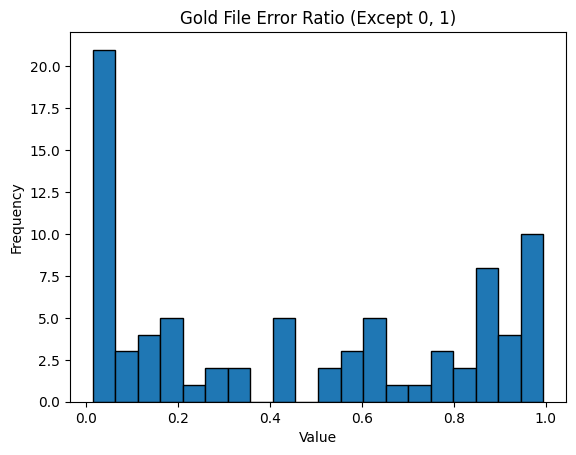

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(unstable_ratio, bins=20, edgecolor='black') 
plt.title('Gold File Error Ratio (Except 0, 1)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()